#                                                          Projet : Analyse de données

## LAARF Adel
## Ezzaim Mohammed
## Chafai Ismail

# Sujet : Analyse de l'Impact de la Pollution sur la Santé et les Dépenses Publiques Associées

# Introduction générale :

Dans un monde confronté à des défis environnementaux et sanitaires croissants, il devient essentiel de comprendre les interactions complexes entre la pollution, les émissions de gaz à effet de serre (GES), et leurs impacts directs sur la santé publique ainsi que sur les dépenses de santé.
Ce projet d'analyse de données vise à explorer ces liens à travers une étude approfondie de données environnementales et sanitaires issues de l'API OECD.

## API OECD

### 1. Documentation sur l’API de l’OCDE


### Définition de l’API
#### L’API de l’OCDE est une interface RESTful basée sur le standard SDMX (Statistical Data and Metadata Exchange). Elle fournit un accès programmatique aux données économiques, sociales et environnementales collectées par l’OCDE. Les données peuvent être requêtées et récupérées dans des formats standardisés tels que JSON, XML et CSV.

### Fonctionnalités principales
#### Accès dynamique aux données : Permet de récupérer des ensembles de données à jour à travers des requêtes personnalisées.
#### Standard SDMX : Offre une structure cohérente et normalisée pour les données statistiques, facilitant leur exploitation pour des analyses avancées.
#### Support multiformat : Les réponses peuvent être adaptées en fonction des besoins (JSON, XML, CSV).
#### Filtres et métadonnées : Les utilisateurs peuvent filtrer les données par dimensions (pays, années, indicateurs) et accéder aux métadonnées structurées.

### 2. Relation entre l’API de l’OCDE et l’analyse de données

#### L’API de l’OCDE est un outil puissant pour l’analyse de données car elle offre :

#### Accès à des données fiables et actualisées : Les données économiques et sociales de l’OCDE sont reconnues pour leur qualité et leur standardisation.
#### Enrichissement des modèles prédictifs : Les données de l’OCDE peuvent être intégrées dans des modèles de classification ou de clustering, notamment pour des analyses sectorielles ou géographiques.

### 3. Justification du choix de l’API de l’OCDE

**Pourquoi avoir choisi l'API OECD ?**

---

- **Richesse et fiabilité des données :**  
  L'API OECD offre des données variées et rigoureuses sur l'environnement, la santé et l'économie, idéales pour des analyses fiables.

- **Portée internationale :**  
  Elle couvre de nombreux pays, permettant des comparaisons globales et régionales.

- **Compatibilité avec le projet :**  
  Les données sont parfaitement alignées sur les besoins du projet, notamment en ce qui concerne les émissions de CO₂, la santé et les dépenses publiques.

- **Facilité d'accès et documentation :**  
  L'API est bien documentée et facile à intégrer dans des outils analytiques, offrant une prise en main rapide.

- **Option de filtrage avancée :**  
  Un avantage unique : possibilité de filtrer les données par période, indicateurs spécifiques ou pays, fonctionnalité que d'autres APIs ne proposent pas.

---


### Récupération de contenu via le générateur de requêtes API
#### Sélectionnez les données dont vous avez besoin dans l'Explorateur des données de l'OCDE, puis cliquez sur l'icône API pour développeur située au-dessus du tableau de données. Cela affichera les requêtes API pour les Données ainsi que pour leur Structure.

#### Pour les utiliser, cliquez simplement sur Copier le code et incluez la syntaxe dans vos appels API.

#### La Requête des données récupère les données réelles de l'ensemble de données, tandis que la Requête de la structure fournit des détails descriptifs, tels que les dimensions et les attributs de l'ensemble de données, également appelés métadonnées structurelles. 

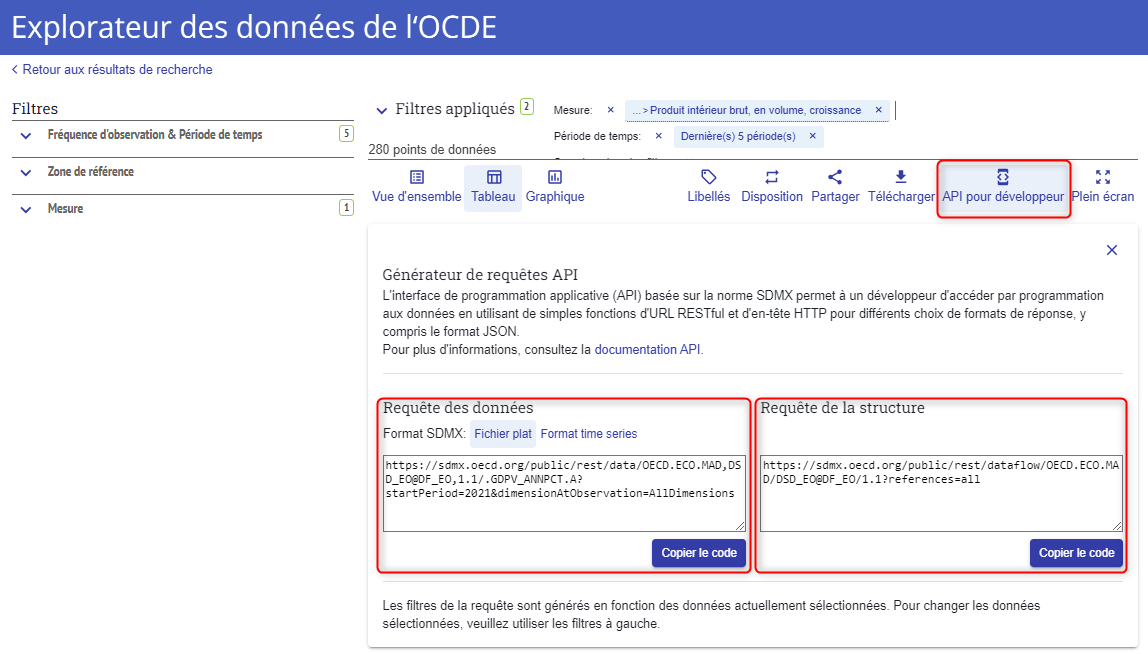

In [20]:
from IPython.display import Image

# Remplacez le chemin de l'image par le chemin absolu ou relatif vers l'image
Image(filename='fr-api.png')


### Syntaxe de la requête de données de l'API
#### La requête de données de l'API est une URL composée des éléments suivants :

##### {URL de l’hôte}/{Identifiant de l’agence},{Identifiant du jeu de données},{Version du jeu de données}/{Sélection des données}?{autres paramètres optionnels}

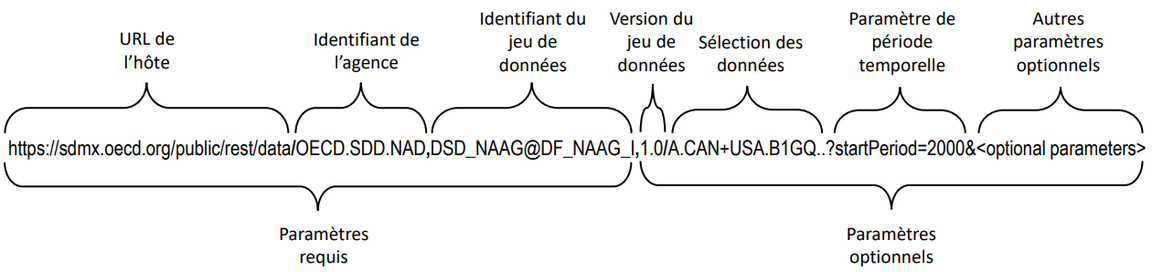

In [21]:
Image(filename='api.png')

## Problématique générale :

- Comment les facteurs environnementaux, tels que la pollution de l'air et les émissions de gaz à effet de serre, influencent-ils la santé publique et les dépenses de santé dans différents pays ?
- Existe-t-il des relations significatives entre ces facteurs et les variations des taux de mortalité et des coûts liés à la santé ?
- Peut-on regrouper les pays en fonction de leurs profils environnementaux et sanitaires à l'aide de méthodes de classification ?

  ---

Pour répondre à cette question, nous utiliserons des méthodes d'analyse de données telles que :
- **la régression linéaire et polynomiale** pour examiner les relations entre les variables,
- **l'Analyse en Composantes Principales (ACP)** pour réduire la complexité des données par reduction de dimension, faciliter la visualisation des pays ayant des caractéristiques similaires, ainsi que
- **la classification** pour regrouper les pays selon leurs profils environnementaux et sanitaires.

  **=>**Ces approches permettront non seulement d'identifier des tendances, mais aussi de visualiser les relations entre les différents facteurs et de proposer des recommandations stratégiques pour améliorer la gestion de la santé publique à l'échelle mondiale.

## Données brutes : Dépenses de santé et financement
### Cette base de données, issue du Système de comptes de la santé 2011, fournit une description systématique des flux financiers liés à la consommation de biens et services de santé. Elle permet de suivre les ressources depuis leurs sources jusqu’à leurs utilisations, offrant des données comparables et pertinentes pour les politiques de santé.

In [27]:
import pandas as pd
import requests
import io  # Import pour StringIO

# URL cible
url = f"https://sdmx.oecd.org/public/rest/data/OECD.ELS.HD,DSD_SHA@DF_SHA,1.0/DEU+AUS+AUT+BEL+CAN+CHL+COL+KOR+CRI+DNK+ESP+EST+USA+FIN+FRA+GRC+HUN+IRL+ISL+ITA+JPN+LVA+LTU+LUX+MEX+NOR+NZL+NLD+POL+PRT+SVK+GBR+CZE+TUR+ZAF+ARG+BRA+BGR+CHN+CYP+HRV+IND+IDN+MLT+PER+ROU+UKR+SVN+SWE+CHE...USD_PPP._T.._T._T._T...Q?startPeriod=2018&endPeriod=2018&dimensionAtObservation=AllDimensions"
# Ajouter un User-Agent pour simuler un navigateur
headers = { 'User-Agent': 'Mozilla/5.0','Accept': 'application/vnd.sdmx.data+csv; charset=utf-8' } 

# Faire la requête GET
download = requests.get(url=url, headers=headers)

# Vérifier si la requête a réussi
if download.status_code == 200:
    # Lire le contenu CSV en DataFrame
    df_depsante = pd.read_csv(io.StringIO(download.text))
    df_depsante  # Afficher les premières lignes
else:
    print(f"Erreur: {download.status_code} - {download.reason}")

df_depsante.head()

,DATAFLOW,REF_AREA,FREQ,MEASURE,UNIT_MEASURE,FINANCING_SCHEME,FINANCING_SCHEME_REV,FUNCTION,MODE_PROVISION,PROVIDER,...,PRICE_BASE,TIME_PERIOD,OBS_VALUE,BASE_PER,CURRENCY,OBS_STATUS,OBS_STATUS2,OBS_STATUS3,UNIT_MULT,DECIMALS
0,OECD.ELS.HD:DSD_SHA@DF_SHA(1.0),LVA,A,EXP_HEALTH,USD_PPP,_T,_Z,_T,_T,_T,...,Q,2018,3343.059,2015,NaN,NaN,NaN,NaN,6,1
1,OECD.ELS.HD:DSD_SHA@DF_SHA(1.0),PER,A,EXP_HEALTH,USD_PPP,_T,_Z,_T,_T,_T,...,Q,2018,21855.116,2015,NaN,NaN,NaN,NaN,6,1
2,OECD.ELS.HD:DSD_SHA@DF_SHA(1.0),CHN,A,EXP_HEALTH,USD_PPP,_T,_Z,_T,_T,_T,...,Q,2018,1131026.480,2015,NaN,NaN,NaN,NaN,6,1
3,OECD.ELS.HD:DSD_SHA@DF_SHA(1.0),MLT,A,EXP_HEALTH,USD_PPP,_T,_Z,_T,_T,_T,...,Q,2018,1724.275,2015,NaN,NaN,NaN,NaN,6,1
4,OECD.ELS.HD:DSD_SHA@DF_SHA(1.0),FRA,A,EXP_HEALTH,USD_PPP,_T,_Z,_T,_T,_T,...,Q,2018,319813.515,2015,NaN,NaN,NaN,NaN,6,1


### Nettoyage de données
#### Nous nous intéressons uniquement aux informations essentielles pour notre analyse, à savoir le pays, l'année 2018, et les dépenses de santé. Ainsi, nous avons nettoyé le dataset en sélectionnant uniquement ces colonnes pertinentes : REF_AREA (pays), TIME_PERIOD (année), et OBS_VALUE (dépenses de santé)



In [30]:
#  Select relevant columns
columns_to_keep = ['REF_AREA', 'OBS_VALUE', 'TIME_PERIOD']
df_depsante_cleaned = df_depsante[columns_to_keep]


# Rename columns for clarity
df_depsante_cleaned = df_depsante_cleaned.rename(columns={
    'REF_AREA': 'Country',
    'TIME_PERIOD': 'Year',
    'OBS_VALUE':'depense sante'
})

df_depsante_cleaned.head()

,Country,depense sante,Year
0,LVA,3343.059,2018
1,PER,21855.116,2018
2,CHN,1131026.480,2018
3,MLT,1724.275,2018
4,FRA,319813.515,2018


## Données brutes : Croissance verte
#### Cette base de données suit les progrès vers une croissance verte à travers des indicateurs regroupés en quatre dimensions principales : productivité environnementale, base d’actifs naturels, qualité de vie environnementale, et opportunités économiques. Elle fournit des informations clés pour évaluer l’efficacité des politiques et les impacts environnementaux sur la qualité de vie et le bien-être, tout en identifiant les opportunités économiques liées à la durabilité.

In [33]:
import pandas as pd
import requests
import io  # Import pour StringIO

# URL cible
url = f"https://sdmx.oecd.org/public/rest/data/OECD.ENV.EPI,DSD_GG@DF_GREEN_GROWTH,1.1/..CO2_PBEM+GHG_PBEM+PM_PWM+PM_MOR+PM_SC+RN_SC+RN_MOR+PB_SC+PB_MOR+GDP_RCAP..?startPeriod=2018&endPeriod=2018&dimensionAtObservation=AllDimensions"
# Ajouter un User-Agent pour simuler un navigateur
headers = { 'User-Agent': 'Mozilla/5.0','Accept': 'application/vnd.sdmx.data+csv; charset=utf-8' } 


# Faire la requête GET
download = requests.get(url=url, headers=headers)

# Vérifier si la requête a réussi
if download.status_code == 200:
    # Lire le contenu CSV en DataFrame
    df_all = pd.read_csv(io.StringIO(download.text))
    df_all  # Afficher les premières lignes
else:
    print(f"Erreur: {download.status_code} - {download.reason}")
df_all

,DATAFLOW,REF_AREA,FREQ,MEASURE,UNIT_MEASURE,ACTIVITY,TIME_PERIOD,OBS_VALUE,OBS_STATUS,OBS_STATUS_2,UNIT_MULT,PRICE_BASE,BASE_PER,TIMELINESS,DECIMALS
0,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),SWE,A,PB_MOR,DT_10P6HB,_T,2018,28.99,A,NaN,0,_Z,NaN,3,2
1,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),BLR,A,PB_MOR,DT_10P6HB,_T,2018,103.64,A,NaN,0,_Z,NaN,3,2
2,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),BRA,A,GHG_PBEM,IX,_T,2018,135.03,A,NaN,0,_Z,2000.0,3,2
3,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),SLB,A,PM_MOR,DT_10P6HB,_T,2018,155.33,A,NaN,0,_Z,NaN,1,2
4,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),BRA,A,RN_SC,PT_B1GQ,_T,2018,0.08,A,NaN,0,_Z,NaN,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),PRK,A,PB_MOR,DT_10P6HB,_T,2018,140.66,A,NaN,0,_Z,NaN,3,2
2095,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),GUM,A,RN_MOR,DT_10P6HB,_T,2018,10.13,A,NaN,0,_Z,NaN,3,2
2096,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),GRL,A,GDP_RCAP,USD_PPP_PS,_T,2018,58866.43,A,NaN,0,Q,2015.0,1,2
2097,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),NPL,A,RN_SC,PT_B1GQ,_T,2018,0.04,A,NaN,0,_Z,NaN,3,2


### Nettoyage de données

#### Nous avons sélectionné uniquement les colonnes pertinentes de la base de données d'origine pour réduire la complexité et rendre les données plus exploitables. Les noms des colonnes ont été renommés pour plus de clarté, en remplaçant les abréviations par des termes explicites.

In [36]:
#  Select relevant columns
columns_to_keep = ['REF_AREA', 'TIME_PERIOD' ,'MEASURE', 'OBS_VALUE',]
df_all_cleaned = df_all[columns_to_keep]

#  Rename columns for clarity
df_all_cleaned = df_all_cleaned.rename(columns={
    'REF_AREA': 'Country',
    'TIME_PERIOD': 'Year'
})

df_all_cleaned

,Country,Year,MEASURE,OBS_VALUE
0,SWE,2018,PB_MOR,28.99
1,BLR,2018,PB_MOR,103.64
2,BRA,2018,GHG_PBEM,135.03
3,SLB,2018,PM_MOR,155.33
4,BRA,2018,RN_SC,0.08
...,...,...,...,...
2094,PRK,2018,PB_MOR,140.66
2095,GUM,2018,RN_MOR,10.13
2096,GRL,2018,GDP_RCAP,58866.43
2097,NPL,2018,RN_SC,0.04


### Réorganisation des données en tableau croisé

#### Les données ont été réorganisées en utilisant une table pivot. Cela permet de structurer les mesures en colonnes distinctes tout en maintenant une indexation claire par pays et par année (2018).

In [40]:
pivot_dfall = df_all_cleaned.pivot_table(
    index=["Country", "Year"],
    columns="MEASURE",
    values="OBS_VALUE",
).reset_index()

pivot_dfall

MEASURE,Country,Year,CO2_PBEM,GDP_RCAP,GHG_PBEM,PB_MOR,PB_SC,PM_MOR,PM_PWM,PM_SC,RN_MOR,RN_SC
0,ABW,2018,NaN,40658.96,NaN,NaN,NaN,NaN,8.87,NaN,NaN,NaN
1,AFG,2018,NaN,2233.82,NaN,227.68,2.29,219.04,65.20,2.20,1.98,0.02
2,AGO,2018,214.340,6149.07,NaN,38.32,0.46,166.78,23.12,1.99,2.06,0.02
3,AIA,2018,NaN,NaN,NaN,NaN,NaN,NaN,7.77,NaN,NaN,NaN
4,ALB,2018,73.140,12945.22,NaN,172.20,1.94,523.65,18.71,5.89,43.67,0.49
...,...,...,...,...,...,...,...,...,...,...,...,...
235,XKV,2018,NaN,NaN,NaN,NaN,NaN,NaN,25.14,NaN,NaN,NaN
236,YEM,2018,42.005,2658.04,NaN,232.25,2.33,382.09,41.78,3.84,1.68,0.02
237,ZAF,2018,293.520,13626.96,322.07,41.59,0.46,435.89,22.93,4.85,6.93,0.08
238,ZMB,2018,198.905,3402.82,NaN,35.62,0.45,161.97,22.20,2.04,1.48,0.02


### Traitement des valeurs manquantes

#### Toutes les lignes contenant des valeurs manquantes ont été supprimées pour garantir la cohérence et la qualité des données, essentiel pour des analyses fiables.


In [43]:
pivot_dfall.dropna(inplace=True)
pivot_dfall.head()

MEASURE,Country,Year,CO2_PBEM,GDP_RCAP,GHG_PBEM,PB_MOR,PB_SC,PM_MOR,PM_PWM,PM_SC,RN_MOR,RN_SC
7,ARG,2018,152.465,19063.84,222.30,37.91,0.41,282.03,13.71,3.02,8.35,0.09
11,AUS,2018,250.955,49577.87,341.92,65.87,0.62,68.25,7.59,0.64,4.31,0.04
12,AUT,2018,80.230,52119.43,83.11,55.31,0.53,259.98,12.54,2.47,44.54,0.42
15,BEL,2018,85.440,47846.57,97.74,124.77,1.20,300.56,12.35,2.90,38.05,0.37
18,BGD,2018,266.775,4199.43,229.50,186.26,2.32,424.71,58.58,5.30,2.04,0.03


### Renommage des colonnes pour une interprétation facile

In [46]:
#Rename columns for clarity
pivot_dfall = pivot_dfall.rename(columns={
    'CO2_PBEM': 'Emissions de CO2',
    'GDP_RCAP': 'PIB par habitant',
    'GHG_PBEM': 'Emissions de GES',
    'PB_MOR': 'Mortalité due au plomb',
    'PB_SC': 'Couts en bien-etre dus a l exposition aux plomb, PIB equivalent',
    'PM_MOR': 'Mortalité due aux PM2.5',
    'PM_PWM': 'Exposition du PM2.5',
    'PM_SC': 'Couts en bien-être dus a l exposition aux  PM2.5, PIB equivalent',
    'RN_MOR': 'Mortalité due aux radon résidentiel' ,
    'RN_SC': 'Couts en bien-etre dus a l exposition aux  radon résidentiel, PIB equivalent',
})

pivot_dfall

MEASURE,Country,Year,Emissions de CO2,PIB par habitant,Emissions de GES,Mortalité due au plomb,"Couts en bien-etre dus a l exposition aux plomb, PIB equivalent",Mortalité due aux PM2.5,Exposition du PM2.5,"Couts en bien-être dus a l exposition aux PM2.5, PIB equivalent",Mortalité due aux radon résidentiel,"Couts en bien-etre dus a l exposition aux radon résidentiel, PIB equivalent"
7,ARG,2018,152.465,19063.84,222.300,37.91,0.41,282.03,13.71,3.02,8.35,0.09
11,AUS,2018,250.955,49577.87,341.920,65.87,0.62,68.25,7.59,0.64,4.31,0.04
12,AUT,2018,80.230,52119.43,83.110,55.31,0.53,259.98,12.54,2.47,44.54,0.42
15,BEL,2018,85.440,47846.57,97.740,124.77,1.20,300.56,12.35,2.90,38.05,0.37
18,BGD,2018,266.775,4199.43,229.500,186.26,2.32,424.71,58.58,5.30,2.04,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...
217,TUR,2018,280.460,28425.66,350.645,57.02,0.60,500.74,23.38,5.26,12.53,0.13
222,UKR,2018,121.605,10350.89,193.550,73.53,0.85,973.57,16.28,11.23,22.57,0.26
224,USA,2018,2498.040,60127.22,3047.405,63.08,0.57,142.62,7.71,1.29,26.85,0.24
231,VNM,2018,387.220,9072.56,349.055,76.26,0.90,377.04,19.62,4.47,5.22,0.06


### Sélection des variables clés pour l'analyse
#### Nous avons extrait un sous-ensemble de colonnes essentielles (comme les émissions de CO2, l'exposition au PM2.5, et la mortalité) pour nous concentrer sur les variables les plus pertinentes à notre problématique. Cela simplifie et cible notre approche analytique.

In [49]:
# Step 1: Select relevant columns
columns_to_keep = ['Country','Emissions de CO2', 'Emissions de GES' ,'Exposition du PM2.5', 'Mortalité due au plomb','Mortalité due aux PM2.5']
pollutant_data = pivot_dfall[columns_to_keep]
pollutant_data

MEASURE,Country,Emissions de CO2,Emissions de GES,Exposition du PM2.5,Mortalité due au plomb,Mortalité due aux PM2.5
7,ARG,152.465,222.300,13.71,37.91,282.03
11,AUS,250.955,341.920,7.59,65.87,68.25
12,AUT,80.230,83.110,12.54,55.31,259.98
15,BEL,85.440,97.740,12.35,124.77,300.56
18,BGD,266.775,229.500,58.58,186.26,424.71
...,...,...,...,...,...,...
217,TUR,280.460,350.645,23.38,57.02,500.74
222,UKR,121.605,193.550,16.28,73.53,973.57
224,USA,2498.040,3047.405,7.71,63.08,142.62
231,VNM,387.220,349.055,19.62,76.26,377.04


In [51]:
df_depsante_cleaned.head()

,Country,depense sante,Year
0,LVA,3343.059,2018
1,PER,21855.116,2018
2,CHN,1131026.480,2018
3,MLT,1724.275,2018
4,FRA,319813.515,2018


## Première fusion des données environnementales et sanitaires

In [54]:
# Fusionner les deux DataFrames sur les colonnes 'Country'
data_finale = pd.merge(pollutant_data, df_depsante_cleaned, on='Country',how='inner') 

# Afficher le DataFrame fusionné
data_finale.head()

,Country,Emissions de CO2,Emissions de GES,Exposition du PM2.5,Mortalité due au plomb,Mortalité due aux PM2.5,depense sante,Year
0,ARG,152.465,222.30,13.71,37.91,282.03,79370.466,2018
1,AUS,250.955,341.92,7.59,65.87,68.25,126657.898,2018
2,AUT,80.230,83.11,12.54,55.31,259.98,45231.436,2018
3,BEL,85.440,97.74,12.35,124.77,300.56,57111.479,2018
4,BGR,66.830,82.19,19.79,259.60,1289.51,11489.321,2018


## Données brutes : Etat de santé
#### Ce jeu de données fournit des statistiques sur l'état de santé, notamment l'espérance de vie, le taux brut de mortalité, le taux de mortalité ajusté selon l'âge, et le taux de mortalité infantile. Ces indicateurs sont calculés à l'échelle de grandes et petites régions (TL2 et TL3) et permettent d'évaluer les disparités de santé et les tendances démographiques, tout en tenant compte des spécificités régionales et des ajustements nécessaires pour une comparabilité internationale.

In [57]:
import pandas as pd
import requests
import io  # Import pour StringIO

# URL cible
url = f"https://sdmx.oecd.org/public/rest/data/OECD.CFE.EDS,DSD_REG_HEALTH@DF_HEALTH,2.0/A.CTRY...MORT_CRUDE_RATIO._T._T.?startPeriod=2018&endPeriod=2018&dimensionAtObservation=AllDimensions"
# Ajouter un User-Agent pour simuler un navigateur
headers = { 'User-Agent': 'Mozilla/5.0','Accept': 'application/vnd.sdmx.data+csv; charset=utf-8' } 


# Faire la requête GET
download = requests.get(url=url, headers=headers)

# Vérifier si la requête a réussi
if download.status_code == 200:
    # Lire le contenu CSV en DataFrame
    df_morta = pd.read_csv(io.StringIO(download.text))
    df_morta  # Afficher les premières lignes
else:
    print(f"Erreur: {download.status_code} - {download.reason}")

df_morta.head()

,DATAFLOW,FREQ,TERRITORIAL_LEVEL,REF_AREA,TERRITORIAL_TYPE,MEASURE,AGE,SEX,UNIT_MEASURE,TIME_PERIOD,OBS_VALUE,COUNTRY,OBS_STATUS,UNIT_MULT,DECIMALS
0,OECD.CFE.EDS:DSD_REG_HEALTH@DF_HEALTH(2.0),A,CTRY,AUS,_Z,MORT_CRUDE_RATIO,_T,_T,10P3HB,2018,6.387,AUS,A,0,2
1,OECD.CFE.EDS:DSD_REG_HEALTH@DF_HEALTH(2.0),A,CTRY,AUT,_Z,MORT_CRUDE_RATIO,_T,_T,10P3HB,2018,9.519,AUT,A,0,2
2,OECD.CFE.EDS:DSD_REG_HEALTH@DF_HEALTH(2.0),A,CTRY,BEL,_Z,MORT_CRUDE_RATIO,_T,_T,10P3HB,2018,9.711,BEL,A,0,2
3,OECD.CFE.EDS:DSD_REG_HEALTH@DF_HEALTH(2.0),A,CTRY,CAN,_Z,MORT_CRUDE_RATIO,_T,_T,10P3HB,2018,7.706,CAN,A,0,2
4,OECD.CFE.EDS:DSD_REG_HEALTH@DF_HEALTH(2.0),A,CTRY,CHL,_Z,MORT_CRUDE_RATIO,_T,_T,10P3HB,2018,5.695,CHL,A,0,2


### Nettoyage des données
#### Les colonnes pertinentes ont été sélectionnées et renommées pour simplifier l'analyse, en conservant uniquement les informations sur les pays et le taux de mortalité.

In [59]:
# Select relevant columns
columns_to_keep = ['REF_AREA', 'OBS_VALUE']
df_morta_cleaned = df_morta[columns_to_keep]

# Rename columns for clarity
df_morta_cleaned = df_morta_cleaned.rename(columns={
    'REF_AREA': 'Country',
    'OBS_VALUE' : 'Taux de mortalite'
})

df_morta_cleaned.head()

,Country,Taux de mortalite
0,AUS,6.387
1,AUT,9.519
2,BEL,9.711
3,CAN,7.706
4,CHL,5.695


## Fusion finale des données pour une analyse complète
#### Les données précédemment consolidées ont été enrichies par une nouvelle fusion avec le taux de mortalité, permettant de relier les indicateurs environnementaux, économiques et de santé à cet aspect crucial.

In [63]:
# Fusionner les deux DataFrames sur les colonnes 'Country'
data_finale_v2 = pd.merge(data_finale, df_morta_cleaned, on='Country',how='inner') 

# Afficher le DataFrame fusionné
data_finale_v2.head()

,Country,Emissions de CO2,Emissions de GES,Exposition du PM2.5,Mortalité due au plomb,Mortalité due aux PM2.5,depense sante,Year,Taux de mortalite
0,AUS,250.955,341.920,7.59,65.87,68.25,126657.898,2018,6.387
1,AUT,80.230,83.110,12.54,55.31,259.98,45231.436,2018,9.519
2,BEL,85.440,97.740,12.35,124.77,300.56,57111.479,2018,9.711
3,BGR,66.830,82.190,19.79,259.60,1289.51,11489.321,2018,15.394
4,CAN,334.875,444.535,6.87,22.34,102.27,182781.747,2018,7.706


### Nettoyage supplémentaire des données
#### Ajustement des valeurs de mortalité , les colonnes 'Mortalité due aux PM2.5' et 'Mortalité due au plomb' sont converties pour exprimer les chiffres par 1000 habitants au lieu de par million.

In [66]:
# Convertir les colonnes 'Mortalité due aux PM2.5' et 'Mortalité due au plomb' en valeurs par 1000 habitants
data_final_v2 = data_finale_v2.copy()
data_finale_v2["Mortalité due aux PM2.5"] = data_finale_v2["Mortalité due aux PM2.5"] / 1000
data_finale_v2["Mortalité due au plomb"] = data_finale_v2["Mortalité due au plomb"] / 1000

data_finale_v2.head()

,Country,Emissions de CO2,Emissions de GES,Exposition du PM2.5,Mortalité due au plomb,Mortalité due aux PM2.5,depense sante,Year,Taux de mortalite
0,AUS,250.955,341.920,7.59,0.06587,0.06825,126657.898,2018,6.387
1,AUT,80.230,83.110,12.54,0.05531,0.25998,45231.436,2018,9.519
2,BEL,85.440,97.740,12.35,0.12477,0.30056,57111.479,2018,9.711
3,BGR,66.830,82.190,19.79,0.25960,1.28951,11489.321,2018,15.394
4,CAN,334.875,444.535,6.87,0.02234,0.10227,182781.747,2018,7.706


# Visualisations 

In [81]:
df_visualisations = data_finale_v2.copy()
df_visualisations = df_visualisations.drop(columns=["Year"])
df_visualisations.head()

,Country,Emissions de CO2,Emissions de GES,Exposition du PM2.5,Mortalité due au plomb,Mortalité due aux PM2.5,depense sante,Taux de mortalite
0,AUS,250.955,341.920,7.59,0.06587,0.06825,126657.898,6.387
1,AUT,80.230,83.110,12.54,0.05531,0.25998,45231.436,9.519
2,BEL,85.440,97.740,12.35,0.12477,0.30056,57111.479,9.711
3,BGR,66.830,82.190,19.79,0.25960,1.28951,11489.321,15.394
4,CAN,334.875,444.535,6.87,0.02234,0.10227,182781.747,7.706


## Structure des données

In [82]:
df_visualisations.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  42 non-null     object 
 1   Emissions de CO2         42 non-null     float64
 2   Emissions de GES         42 non-null     float64
 3   Exposition du PM2.5      42 non-null     float64
 4   Mortalité due au plomb   42 non-null     float64
 5   Mortalité due aux PM2.5  42 non-null     float64
 6   depense sante            42 non-null     float64
 7   Taux de mortalite        42 non-null     float64
dtypes: float64(7), object(1)
memory usage: 2.8+ KB


## Statistiques descriptives des variables

In [83]:
df_visualisations.describe()

,Emissions de CO2,Emissions de GES,Exposition du PM2.5,Mortalité due au plomb,Mortalité due aux PM2.5,depense sante,Taux de mortalite
count,42.000000,42.000000,42.000000,42.000000,42.000000,4.200000e+01,42.000000
mean,189.644881,233.517500,13.172381,0.073362,0.331771,1.600198e+05,9.249667
std,383.721645,467.012699,5.262014,0.053133,0.255012,5.041528e+05,2.762741
min,37.235000,39.415000,5.520000,0.011350,0.045280,1.488728e+03,4.749000
25%,60.097500,71.893750,8.952500,0.037360,0.146235,1.159005e+04,6.878250
50%,78.515000,92.655000,12.445000,0.058715,0.272865,3.082756e+04,9.189500
75%,194.985000,266.783750,16.482500,0.087482,0.434720,1.189977e+05,10.865500
max,2498.040000,3047.405000,25.540000,0.259600,1.289510,3.249076e+06,15.394000


Les grandes disparités dans les émissions de CO2 et de GES, l'exposition à la pollution, ainsi que les dépenses de santé, indiquent que certains pays contribuent de manière disproportionnée aux problèmes environnementaux et sanitaires mondiaux. Ces inégalités soulignent la nécessité d'une approche plus ciblée pour comprendre les liens entre pollution, santé publique et politiques économiques.

## Pays avec les taux de mortalité les plus élevés

In [84]:
df_visualisations.nlargest(10, "Taux de mortalite")[["Country", "Taux de mortalite"]]

,Country,Taux de mortalite
3,BGR,15.394
28,LVA,14.899
26,LTU,14.089
36,ROU,13.511
20,HUN,13.405
19,HRV,12.838
14,EST,11.940
11,DEU,11.533
18,GRC,11.200
35,PRT,10.985


## Sauvegarde des Données Nettoyées dans un Fichier CSV

In [85]:
# 9. Sauvegarder les données nettoyées dans un fichier CSV
output_path = "data_api.csv"  # Chemin pour le fichier nettoyé
data_finale_v2.to_csv(output_path, index=False)

# Lecture des Données Sauvegardées

In [1]:
import pandas as pd
# Lecture du fichier CSV
data_finale_v2 = pd.read_csv("data_api.csv")

# Affichage des premières lignes pour vérifier
data_finale_v2

,Country,Emissions de CO2,Emissions de GES,Exposition du PM2.5,Mortalité due au plomb,Mortalité due aux PM2.5,depense sante,Year,Taux de mortalite
0,AUS,250.955,341.920,7.59,0.06587,0.06825,126657.898,2018,6.387
1,AUT,80.230,83.110,12.54,0.05531,0.25998,45231.436,2018,9.519
2,BEL,85.440,97.740,12.35,0.12477,0.30056,57111.479,2018,9.711
3,BGR,66.830,82.190,19.79,0.25960,1.28951,11489.321,2018,15.394
4,CAN,334.875,444.535,6.87,0.02234,0.10227,182781.747,2018,7.706
5,CHE,60.440,72.790,10.08,0.04513,0.15708,56165.119,2018,7.907
6,CHL,131.070,129.525,23.07,0.01135,0.29523,39831.548,2018,5.695
7,COL,104.015,140.770,15.70,0.07231,0.25348,54394.337,2018,4.870
8,CRI,88.890,75.870,14.90,0.08212,0.18321,7139.793,2018,4.749
9,CYP,53.060,57.115,15.10,0.06972,0.32526,2135.043,2018,6.674


# Problématique
#### Comment l'exposition au PM2.5 influence-t-elle la mortalité attribuée à cette même pollution ? Existe-t-il une relation linéaire entre ces deux variables, et cette relation est-elle suffisamment significative pour expliquer les variations dans la mortalité due aux PM2.5 ?

# Partie 1 : Régression linéaire simple

## Étape 1 : Préparation des Données

### Description des données :
#### Nous avons des informations pour différents pays sur des indicateurs clés tels que :

##### Les émissions de CO2 et de gaz à effet de serre (GES), qui reflètent l'impact environnemental.
##### Les indicateurs de qualité de l'air, comme l'exposition au PM2.5.
##### Les taux de mortalité associés à des facteurs environnementaux (plomb et PM2.5).
##### Les dépenses en santé publique, qui montrent les efforts économiques des pays pour gérer les impacts de la pollution.

In [114]:
data_regression = data_finale_v2.copy()
data_regression.head()

,Country,Emissions de CO2,Emissions de GES,Exposition du PM2.5,Mortalité due au plomb,Mortalité due aux PM2.5,depense sante,Year,Taux de mortalite
0,AUS,250.955,341.920,7.59,0.06587,0.06825,126657.898,2018,6.387
1,AUT,80.230,83.110,12.54,0.05531,0.25998,45231.436,2018,9.519
2,BEL,85.440,97.740,12.35,0.12477,0.30056,57111.479,2018,9.711
3,BGR,66.830,82.190,19.79,0.25960,1.28951,11489.321,2018,15.394
4,CAN,334.875,444.535,6.87,0.02234,0.10227,182781.747,2018,7.706


In [115]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.diagnostic import het_white

## Étape 2 : Sélection des variables

In [116]:
# define le variable independant  x
X = data_regression['Exposition du PM2.5']
# define le variable dependant  y
y = data_regression['Mortalité due aux PM2.5']
# ajouter un colonne contient des '1' (y=ax+1*b)
X = sm.add_constant(X)

## Étape 3 : Nuage de points
Un nuage de points est créé pour visualiser la relation entre Mortalité due aux PM2.5 et les pollution de l'air PM2.5. 

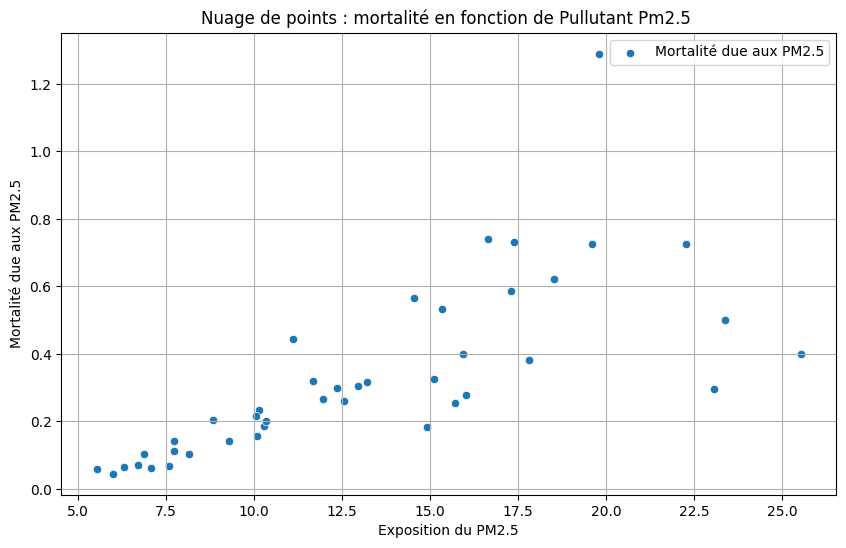

In [117]:
# Creer un scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Exposition du PM2.5', y='Mortalité due aux PM2.5', data=data_regression)

# Ajouter des titres et des labels
plt.title('Nuage de points : mortalité en fonction de Pullutant Pm2.5 ')
plt.xlabel('Exposition du PM2.5')
plt.ylabel('Mortalité due aux PM2.5')
plt.legend(['Mortalité due aux PM2.5'])
plt.grid(True)

# Afficher le graphique
plt.show()

#### Interpretation:
Le nuage de points montre une relation positive entre l'exposition de PM2.5 et Mortalité due aux PM2.5. Cela signifie que, dans l'ensemble, à mesure que l'exposition de PM2.5 augmente, Mortalité due aux PM2.5 tend également à augmenter. Il y a une certaine dispersion des points autour de la tendance générale, ce qui suggère qu'il y a d'autres facteurs qui peuvent influencer la mortalité due aux PM2.5

## Étape 4 : Ajustement du modèle de régression linéaire

In [118]:
# creation d'un modèle de régression linéaire simple
model = sm.OLS(y, X).fit()

## Étape 5 : Affichage du nuage de points avec la droite de régression

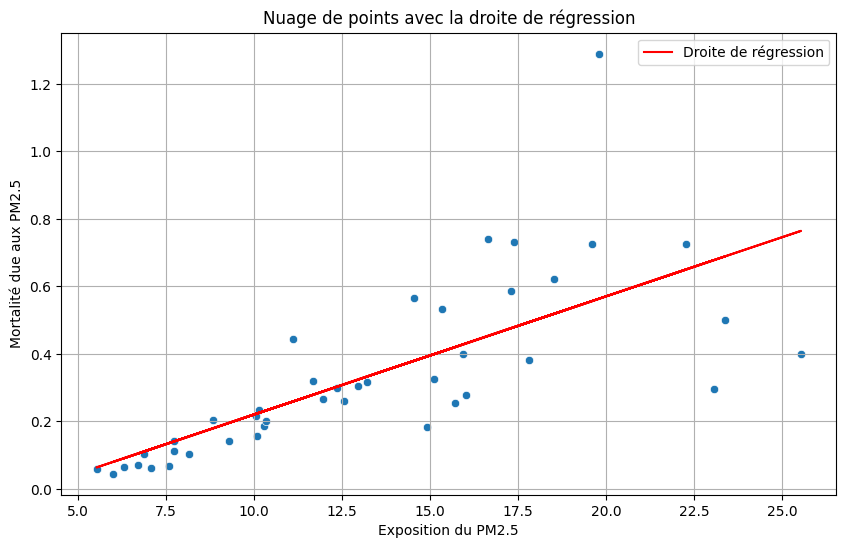

In [119]:
# Prédire les valeurs de y à partir du modèle
y_pred = model.predict(X)

# Créer le nuage de points avec la droite de régression
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Exposition du PM2.5', y='Mortalité due aux PM2.5', data=data_regression)
plt.plot(data_regression['Exposition du PM2.5'], y_pred, color='red', label='Droite de régression')

# Ajouter des titres et des labels
plt.title('Nuage de points avec la droite de régression')
plt.xlabel('Exposition du PM2.5')
plt.ylabel('Mortalité due aux PM2.5')
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()


#### Interpretation:

L'ajout d'une droite de régression au nuage de points permet de visualiser la relation linéaire entre la mortalité due aux PM2.5 et pollution de l'air PM2.5.
La droite de régression représente la meilleure approximation linéaire des données, en minimisant la distance entre les points et la droite.

## Étape 6 : Tests de régression

In [120]:
# Test de Durbin-Watson (INDÉPENDANCE DES ERREURS ) 
dw = sm.stats.durbin_watson(model.resid)
print(f'Test de Durbin-Watson: {dw}')



Test de Durbin-Watson: 1.820716674242786


La statistique de Durbin-Watson de 1.82 et proche de 2 , indique une absence significative d'autocorrélation dans les résidus du modèle. Cela signifie que les erreurs du modèle sont indépendantes, ce qui valide une des hypothèses importantes de la régression linéaire. Le modèle est donc fiable sur cet aspect.


In [122]:
# Test de White pour l'hétéroscédasticité
white_test = het_white(model.resid, model.model.exog)

# Résultats du test de White
print(f"Statistic du test de White: {white_test[0]}")
print(f"P-value du test de White: {white_test[1]}")
print(f"Statistique de LM du test de White: {white_test[2]}")
print(f"P-value de LM du test de White: {white_test[3]}")


Statistic du test de White: 8.538036022879021
P-value du test de White: 0.013995519847984758
Statistique de LM du test de White: 4.975550824212727
P-value de LM du test de White: 0.011895745670108048


Les résultats du test de White indiquent clairement qu'il y a une hétéroscédasticité significative dans les résidus du modèle. Cela signifie que la variance des erreurs n'est pas constante à travers les différentes valeurs des variables explicative.

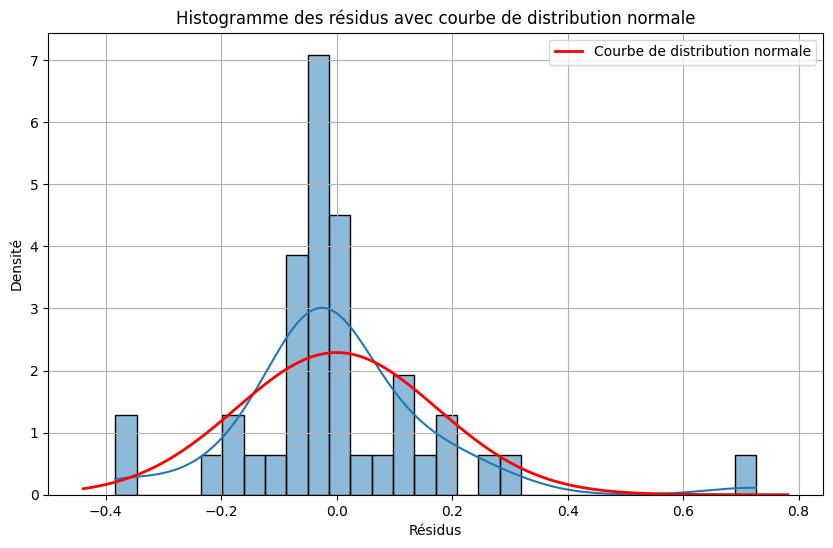

In [123]:
# Calculer les résidus
residus = model.resid

# Créer l'histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residus, kde=True, stat="density", bins=30)

# Ajouter une courbe de distribution normale
mu, std = stats.norm.fit(residus)  # Fit de la normale
xmin, xmax = plt.xlim()  # Limites x pour la courbe
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)  # PDF de la normale
plt.plot(x, p, 'r', linewidth=2, label='Courbe de distribution normale')

# Ajouter des titres et des labels
plt.title('Histogramme des résidus avec courbe de distribution normale')
plt.xlabel('Résidus')
plt.ylabel('Densité')
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()

L'histogramme des résidus montre une distribution proche de la normale, ce qui suggère que les erreurs de prédiction suivent une distribution aléatoire et symétrique autour de zéro. Cela indique que le modèle est bien ajusté dans une certaine mesure, car il n'y a pas de biais systématique dans les erreurs. 

## L'Erreur Quadratique Moyenne (MSE)

In [124]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X)  # Prédictions du modèle

# Calcul de l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(y, y_pred)

print(f"Erreur quadratique moyenne (MSE): {mse}")


Erreur quadratique moyenne (MSE): 0.030350246875332203


##### Le MSE de 0.03035 montre que le modèle est bien ajusté pour capturer la relation entre l'exposition au PM2.5 et la mortalité due au PM2.5. Cette faible erreur indique que l'écart entre les valeurs réelles et prédites est minime, suggérant que le modèle explique efficacement l'impact de l'exposition au PM2.5 sur la mortalité.

## Calcul du coefficient de détermination R^2

In [125]:
# Calcul du coefficient de détermination R^2
r2_score = model.rsquared

print(f"Coefficient de détermination (R^2): {r2_score}")

Coefficient de détermination (R^2): 0.5219145751455898


Le coefficient de détermination (R²) de 0.5219 indique que le modèle explique environ 52.19 % de la variance observée dans la mortalité due au PM2.5 en fonction de l'exposition au PM2.5. Cela suggère une relation modérée entre les deux variables, montrant que l'exposition au PM2.5 contribue de manière significative à la mortalité, mais que près de 47.81 % de la variance reste inexpliquée par le modèle.

## Conclusion 
Dans cette analyse, nous avons observé une relation positive entre l'exposition aux PM2.5 et la mortalité due à cette pollution, avec un R² de 52,19 %, ce qui indique que le modèle explique une part modérée de la variance. Toutefois, cela suggère que d'autres facteurs influencent la mortalité. Le test de White met en évidence une hétéroscédasticité, tandis que le test de Durbin-Watson (1,82) suggère une légère autocorrélation dans les résidus, ce qui pourrait affecter la précision des prédictions. Le MSE de 0.0303 indique une erreur acceptable, mais des améliorations sont possibles.

Ces résultats montrent que, bien que l'exposition au PM2.5 ait un impact significatif sur la mortalité, le modèle pourrait être amélioré. Une régression polynomiale pourrait permettre d'améliorer le R² et mieux capturer les relations non linéaires entre les variables, ce qui sera l'étape suivante de notre analyse.

# Partie 2: Régression Polynomiale

In [137]:
data = data_finale_v2

In [138]:
data.head(10)

,Country,Emissions de CO2,Emissions de GES,Exposition du PM2.5,Mortalité due au plomb,Mortalité due aux PM2.5,depense sante,Year,Taux de mortalite
0,AUS,250.955,341.920,7.59,0.06587,0.06825,126657.898,2018,6.387
1,AUT,80.230,83.110,12.54,0.05531,0.25998,45231.436,2018,9.519
2,BEL,85.440,97.740,12.35,0.12477,0.30056,57111.479,2018,9.711
3,BGR,66.830,82.190,19.79,0.25960,1.28951,11489.321,2018,15.394
4,CAN,334.875,444.535,6.87,0.02234,0.10227,182781.747,2018,7.706
5,CHE,60.440,72.790,10.08,0.04513,0.15708,56165.119,2018,7.907
6,CHL,131.070,129.525,23.07,0.01135,0.29523,39831.548,2018,5.695
7,COL,104.015,140.770,15.70,0.07231,0.25348,54394.337,2018,4.870
8,CRI,88.890,75.870,14.90,0.08212,0.18321,7139.793,2018,4.749
9,CYP,53.060,57.115,15.10,0.06972,0.32526,2135.043,2018,6.674


## Nuage de points

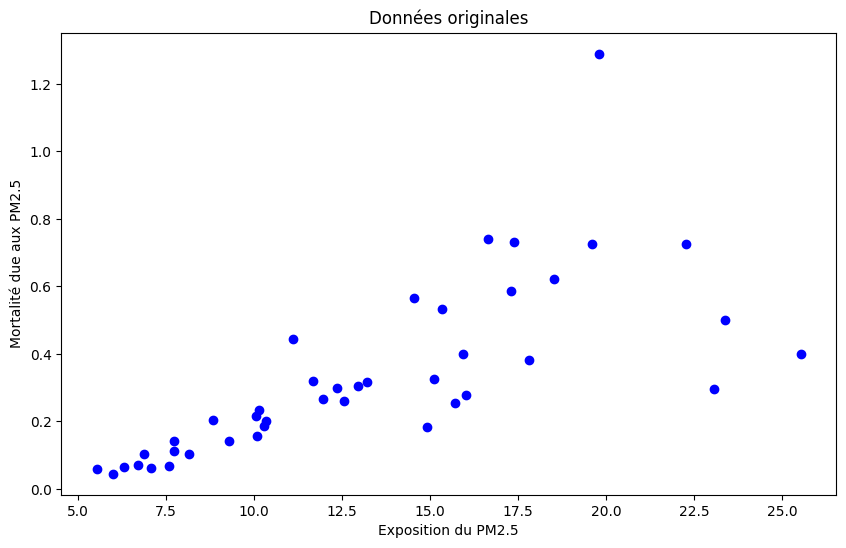

In [139]:

import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression


X = data[['Exposition du PM2.5']].values
y = data['Mortalité due aux PM2.5'].values

plt.figure(figsize=(10, 6))

# Vérifier la distribution des données
plt.scatter(X, y, color='blue', label='Données réelles')
plt.xlabel('Exposition du PM2.5')
plt.ylabel('Mortalité due aux PM2.5')
plt.title('Données originales')
plt.show()



## Normalisation des données

In [130]:
# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Diviser les données en ensembles d'entraînement (70%) et de test (30%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## Choisir le degré optimal

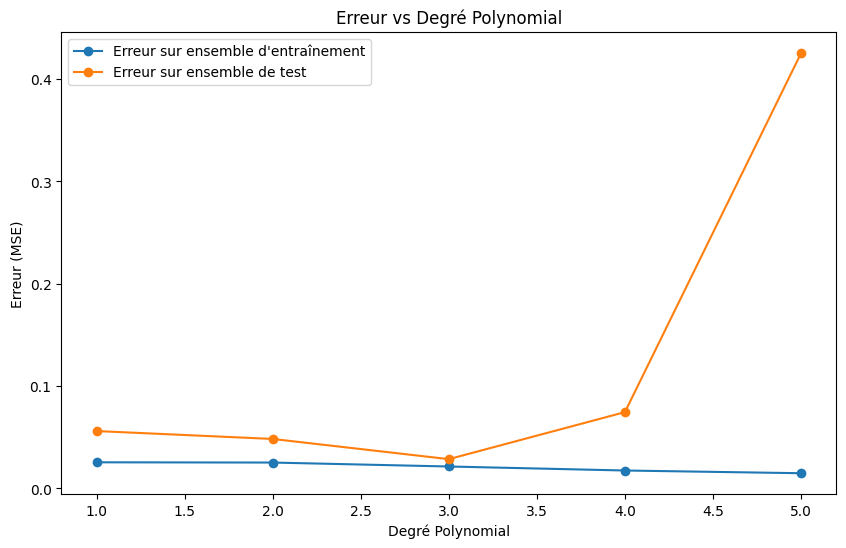

In [131]:
from sklearn.metrics import mean_squared_error, r2_score

# Tester différents degrés
degrees = range(1, 6)
train_errors = []
test_errors = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    y_train_pred = model.predict(X_poly_train)
    y_test_pred = model.predict(X_poly_test)
    
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Visualiser les erreurs
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Erreur sur ensemble d\'entraînement', marker='o')
plt.plot(degrees, test_errors, label='Erreur sur ensemble de test', marker='o')
plt.title('Erreur vs Degré Polynomial')
plt.xlabel('Degré Polynomial')
plt.ylabel('Erreur (MSE)')
plt.legend()
plt.show()


Le graphique montre clairement que la régression polynomiale de degré 3 est le meilleur choix pour modéliser la relation entre l'exposition au PM2.5 et la mortalité. Cela confirme que la relation n'est pas linéaire et qu'un modèle polynomial est plus adapté pour expliquer les variations dans la mortalité due aux PM2.5.

### Application et évaluation de la régression polynomiale (degré 3)

In [132]:
# Appliquer la transformation polynomiale (degré 3)
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Créer et ajuster le modèle de régression polynomiale
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Prédictions
y_pred_train = model.predict(X_poly_train)
y_pred_test = model.predict(X_poly_test)



## Visualisation de la régression polynomiale corrigée : Exposition au PM2.5 vs Mortalité due aux PM2.5

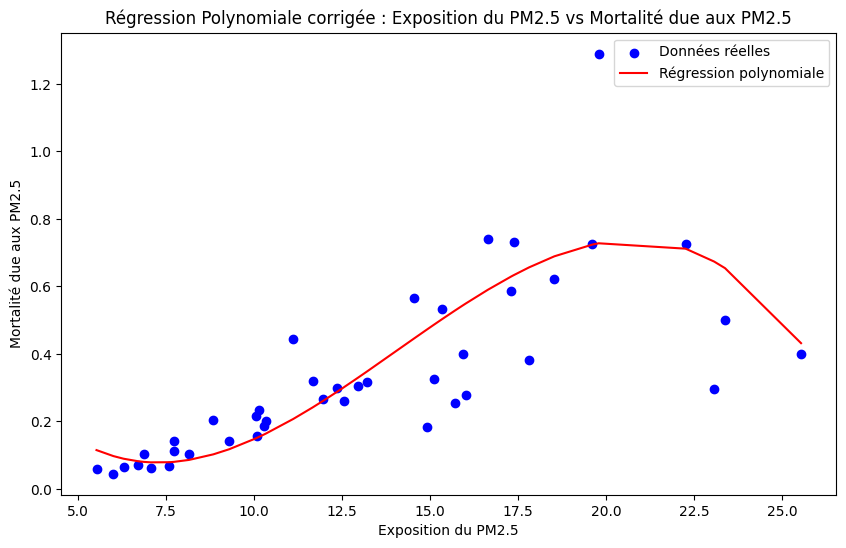

In [133]:

# Visualisation des résultats
plt.figure(figsize=(10, 6))

# Inverser la normalisation pour afficher les axes dans leur unité originale
X_original = scaler.inverse_transform(X_scaled)

# Trier les points pour une courbe plus lisse
sorted_indices = np.argsort(X_original.flatten())
X_sorted = X_original[sorted_indices]
y_pred_sorted = model.predict(poly.transform(scaler.transform(X_sorted)))

plt.scatter(X_original, y, color='blue', label='Données réelles')  # Données réelles
plt.plot(X_sorted, y_pred_sorted, color='red', label='Régression polynomiale')  # Courbe ajustée

plt.title('Régression Polynomiale corrigée : Exposition du PM2.5 vs Mortalité due aux PM2.5')
plt.xlabel('Exposition du PM2.5')
plt.ylabel('Mortalité due aux PM2.5')
plt.legend()
plt.show()


La courbe de régression polynomiale montre une tendance non linéaire entre l'exposition au PM2.5 et la mortalité due aux PM2.5. Cela suggère que l'impact des PM2.5 sur la mortalité n'est pas proportionnel et pourrait augmenter de manière accélérée à des niveaux d'exposition plus élevés.
Ainsi, la proximité de la courbe de régression par rapport aux données réelles indique à quel point le modèle polynomial est bien ajusté. 

## Analyse de la régression polynomiale avec intervalle de confiance et évaluation de la précision du modèle

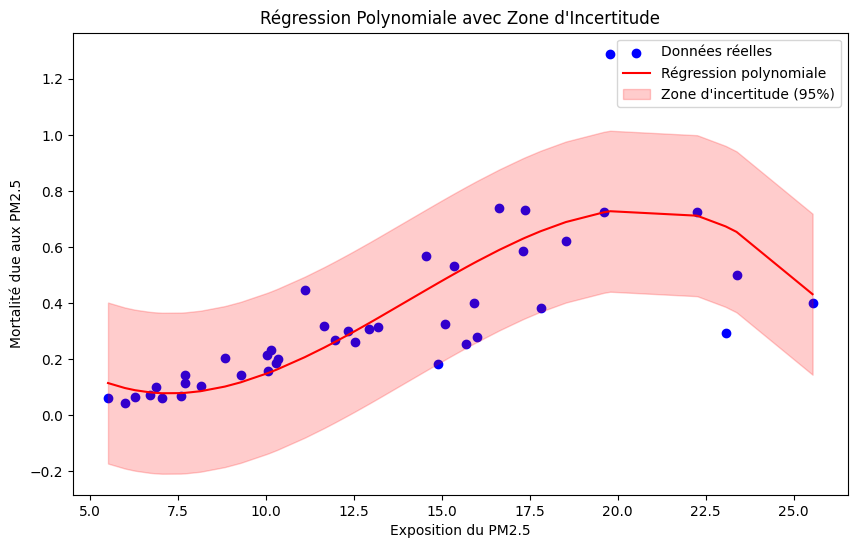

In [134]:
from sklearn.metrics import r2_score

# Calcul des résidus sur l'ensemble d'entraînement
residuals = y_train - y_pred_train
std_dev = np.std(residuals)

# Calcul des prédictions moyennes et des marges d'incertitude
y_pred_mean = model.predict(poly.transform(scaler.transform(X_sorted)))
lower_bound = y_pred_mean - 1.96 * std_dev  # Intervalle de confiance à 95%
upper_bound = y_pred_mean + 1.96 * std_dev


# Calcul de R^2 pour les ensembles d'entraînement 
r2_train = r2_score(y_train, y_pred_train)

# Visualisation
plt.figure(figsize=(10, 6))
plt.scatter(X_original, y, color='blue', label='Données réelles')
plt.plot(X_sorted, y_pred_sorted, color='red', label='Régression polynomiale')
plt.fill_between(X_sorted.flatten(), lower_bound, upper_bound, color='red', alpha=0.2, label='Zone d\'incertitude (95%)')

plt.title('Régression Polynomiale avec Zone d\'Incertitude')
plt.xlabel('Exposition du PM2.5')
plt.ylabel('Mortalité due aux PM2.5')
plt.legend()
plt.show()

La zone d'incertitude permet de visualiser la confiance que l'on peut accorder aux prédictions du modèle, tout en mettant en évidence les régions où le modèle est moins précis. Cela souligne l'importance de prendre en compte des facteurs supplémentaires pour mieux comprendre et prédire l'impact de la pollution sur la santé publique, en particulier aux niveaux d'exposition extrêmes.

## L'Erreur Quadratique Moyenne (MSE)

In [135]:
mse = mean_squared_error(y_train, y_pred_train)
print(f"Erreur quadratique moyenne (MSE): {mse}")


Erreur quadratique moyenne (MSE): 0.021440264581835837


Le MSE de 0.02144 dans la régression polynomiale est relativement proche de celui de la régression linéaire (0.003). Cela suggère qu'il n'y a pas de différence majeure en termes de performance prédictive entre les deux modèles

## Calcul du coefficient de détermination R^2


In [136]:
print(f"R² (entraînement) : {r2_train:.4f}")

R² (entraînement) : 0.7232


Avec un R² de 0.7232, le modèle de régression polynomiale explique environ 72,32 % de la variance des données d'entraînement, ce qui montre une amélioration par rapport à la régression linéaire. Cela suggère une meilleure capacité de prédiction, bien qu'il reste encore des facteurs non capturés par le modèle.

# Partie 3: Régression linéaire multiple

## Problématique 
#### Comment les émissions de CO2 et les émissions de GES influencent-elles les dépenses de santé dans différents pays ? Plus spécifiquement, dans quelle mesure ces deux facteurs expliquent-ils les variations des dépenses de santé, et quel est leur impact relatif ?

## Étape 1 : Préparation des Données

In [154]:
import pandas as pd
import matplotlib.pyplot as mb
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [155]:
data_regression.head()

,Country,Emissions de CO2,Emissions de GES,Exposition du PM2.5,Mortalité due au plomb,Mortalité due aux PM2.5,depense sante,Year,Taux de mortalite
0,AUS,250.955,341.920,7.59,0.06587,0.06825,126657.898,2018,6.387
1,AUT,80.230,83.110,12.54,0.05531,0.25998,45231.436,2018,9.519
2,BEL,85.440,97.740,12.35,0.12477,0.30056,57111.479,2018,9.711
3,BGR,66.830,82.190,19.79,0.25960,1.28951,11489.321,2018,15.394
4,CAN,334.875,444.535,6.87,0.02234,0.10227,182781.747,2018,7.706


## Étape 2 : Sélection des variables.

In [156]:

Y = data_regression["depense sante"]
X = data_regression[["Emissions de CO2", "Emissions de GES"]]


## Étape 3 : Nuage de points

Le nuage de points est affiché avec une droite de régression qui représente la relation linéaire entre Emissions de CO2 , Emissions de GES et les depenses en sante

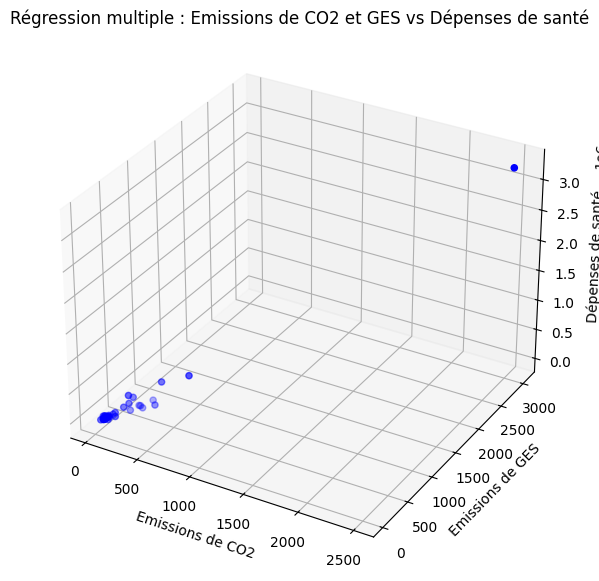

In [157]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Création d'un graphique 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Nuage de points pour les émissions de CO2, GES, et dépenses de santé
ax.scatter(data_regression["Emissions de CO2"], 
           data_regression["Emissions de GES"], 
           data_regression["depense sante"], c='b', marker='o')

# Ajouter des labels
ax.set_xlabel('Emissions de CO2')
ax.set_ylabel('Emissions de GES')
ax.set_zlabel('Dépenses de santé')

# Ajouter un titre
ax.set_title('Régression multiple : Emissions de CO2 et GES vs Dépenses de santé')

# Afficher le graphique
plt.show()


## Étape 4 : Ajustement du modèle de régression linéaire

Un modèle de régression linéaire multiple est ajusté en utilisant la méthode des moindres carrés ordinaires (OLS) de la bibliothèque statsmodels.

In [158]:
#code ici
scale = StandardScaler()
X_scaled = scale.fit_transform(X[["Emissions de CO2", "Emissions de GES"]])

X = sm.add_constant(X_scaled)
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          depense sante   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     915.6
Date:                Sat, 04 Jan 2025   Prob (F-statistic):           1.67e-33
Time:                        00:34:02   Log-Likelihood:                -529.30
No. Observations:                  42   AIC:                             1065.
Df Residuals:                      39   BIC:                             1070.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         1.6e+05   1.15e+04     13.893      0.000    1.37e+05    1.83e+05
x1          9.232e+04   2.14e+05      0.432      0.668    -3.4e+05    5.25e+05
x2          4.007e+05   2.14e+05      1.873      0.069   -3.19e+04    8.33e+05
==============================================================================
Omnibus:                       19.172   Durbin-Watson:                   2.322
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.852
Skew:                          -1.577   Prob(JB):                     6.62e-06
Kurtosis:                       4.920   Cond. No.                         37.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interprétation des résultats :
##### Variable x1 (émissions de CO2) : Cette variable a un effet positif sur les dépenses de santé, mais avec une p-valeur de 0.668, cet effet n’est pas statistiquement significatif. Cela suggère que l’influence des émissions de CO2 sur les dépenses de santé n'est pas suffisamment forte pour être détectée dans ce modèle.
##### Variable x2 (émissions de GES) : Cette variable montre un effet positif important. Cependant, avec une p-valeur de 0.069, cet effet est marginalement non significatif au seuil de 5 %, mais il pourrait être considéré comme significatif au seuil de 10 %.
##### Qualité globale du modèle :  Le modèle explique 97.9 % (en R2) de la variance des dépenses de santé, ce qui indique un excellent ajustement global.



## Étape 5 : Affichage du nuage de points avec le plan de régression.

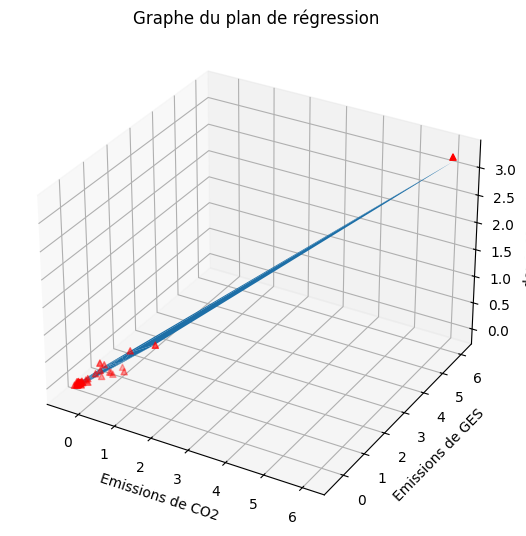

In [159]:
#code ici

# Effectuez les prédictions
Y_predict = model.predict(X)

# Créez une figure avec une taille personalisée
grp = mb.figure(figsize=(14, 9))

# Ajoute un sous-graphique 3D
ax = grp.add_subplot(1, 2, 1, projection="3d")
                      
# Nuage de points avec Les données réelles 
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], data_regression["depense sante"], c='r', marker='^')

# Ajoutez des étiquettes aux axes ax. set.
ax.set_xlabel ('Emissions de CO2')
ax.set_ylabel('Emissions de GES')
ax.set_zlabel('depense sante')

mb.title('Graphe du plan de régression')


# Tracé de la surface triangulée avec Les prédictions 
ax.plot_trisurf(X_scaled[:, 0], X_scaled[:, 1], Y_predict)

# Affichez la figure
mb.show()

## Étape 6 : Tests de régression

In [160]:
#code ici
# Test de Durbin-Watson

# Calculez la statistique Durbin-Watson (DW)
dw = sm.stats.stattools.durbin_watson(model.resid)

print(f"Statistique Durbin-Watson (DW) : {dw:.2f}")


Statistique Durbin-Watson (DW) : 2.32


DW de 2.32 indique une absence notable d'autocorrélation significative dans les résidus. La légère déviation par rapport à 2 ne suggère pas de problème d'autocorrélation négative, et les erreurs peuvent être considérées comme indépendantes.

In [161]:
# Test de White pour l'hétéroscédasticité

from statsmodels.stats.diagnostic import het_white


# Effectuer le test de white
white_test_statistic, white_test_P_value, fstat, f_P_value = het_white(model.resid, X)


print(f"Statistique de White -- statistique du test : {white_test_statistic: 4f}")
print(f"Statistique de White -- valeur p : {white_test_P_value: 4f}")

if white_test_P_value < 0.05:
     print("hétéroscédasticité détéctée : la variance des résidus n'est pas constante")
else:
     print("Aucune hétéroscédasticité significative détéctée")




Statistique de White -- statistique du test :  19.410785
Statistique de White -- valeur p :  0.001611
hétéroscédasticité détéctée : la variance des résidus n'est pas constante


Avec une p-valeur bien inférieure au seuil standard de 0.05, le test détecte une hétéroscédasticité significative, et donc le test de White confirme que l'hypothèse d'homoscédasticité est violée

## Étape 7 : Résumé du modèle

In [162]:
#code ici
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


# Ajout d'une constante (intercept) pour le modèle
X = sm.add_constant(X)

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

# Création du modèle de régression linéaire avec statsmodels
model = sm.OLS(Y_train, X_train)

# Ajustement du modèle
results = model.fit()

# Affichage du résumé du modèle
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          depense sante   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     58.56
Date:                Sat, 04 Jan 2025   Prob (F-statistic):           2.35e-10
Time:                        00:34:45   Log-Likelihood:                -359.39
No. Observations:                  29   AIC:                             724.8
Df Residuals:                      26   BIC:                             728.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.381e+05   1.21e+04     11.392      0.0

## Étape 8 : Calcul de l'Erreur quadratique moyenne (MSE).

In [163]:
#code ici

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Création et entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, Y_train)

# Prédictions sur l'ensemble de test
Y_predict = model.predict(X_test)

# Calcul de l'erreur quadratique moyenne (MSE)
mse = metrics.mean_squared_error(Y_test, Y_predict)
print('Mean Squared Error (MSE):', mse)

Mean Squared Error (MSE): 63232414146.01263


Le MSE indique une grande marge d'erreur dans les prédictions du modèle. Un MSE aussi élevé suggère que le modèle a une capacité limitée à prédire correctement les dépenses de santé à partir des variables indépendantes (émissions de CO2 et de GES). Cela peut indiquer que les relations entre les variables sont mal capturées ou que d'autres facteurs non inclus dans le modèle influencent fortement les dépenses de santé. 

## Étape 9 : Coefficient de détermination (R²).

In [164]:
from sklearn.metrics import r2_score

# Calcul de R² sur l'ensemble de test
r2 = r2_score(Y_test, Y_predict)
print('Coefficient de détermination (R²):', r2)

Coefficient de détermination (R²): 0.9133975745164753


R2 indique que 91.34 % de la variance des dépenses de santé est expliquée par le modèle de régression, ce qui suggère un excellent ajustement. Cela signifie que les variables indépendantes (émissions de CO2 et de GES) expliquent une grande part des fluctuations des dépenses de santé.

## Conclusion
#### En conclusion, bien que les émissions de CO2 et de GES soient des facteurs majeurs dans la variation des dépenses de santé, le modèle doit être affiné pour résoudre les problèmes d’hétéroscédasticité et de multicolinéarité, et pour améliorer la robustesse des conclusions.

# Partie 4: ACP

### Objectif:

L'objectif de cette analyse est de réduire la dimensionnalité des données tout en préservant autant que possible la variance initiale, afin de mieux comprendre les relations entre les différentes variables. En appliquant l'Analyse en Composantes Principales (ACP) sur les données d'émissions de CO2, émissions de gaz à effet de serre (GES), exposition au PM2.5, mortalité liée à la pollution, dépenses de santé, et taux de mortalité.

l'objectif est de :
- dentifier les principales composantes qui expliquent la majorité de la variance dans les données.
- Visualiser les relations sous-jacentes entre ces variables.
- Simplifier les données pour faciliter l'interprétation et la modélisation future.

### Problématique :

Comment l'Analyse en Composantes Principales (ACP) peut-elle simplifier des données complexes en réduisant leur dimension, afin d'identifier les relations clés entre les facteurs environnementaux et sanitaires, tout en permettant une visualisation claire et efficace des pays partageant des caractéristiques similaires pour mieux comprendre leur impact sur la santé publique et les dépenses de santé ?

### Matrice de graphiques en nuage de points

Visualisation des données brutes (sans ACP)

<Figure size 1000x600 with 0 Axes>

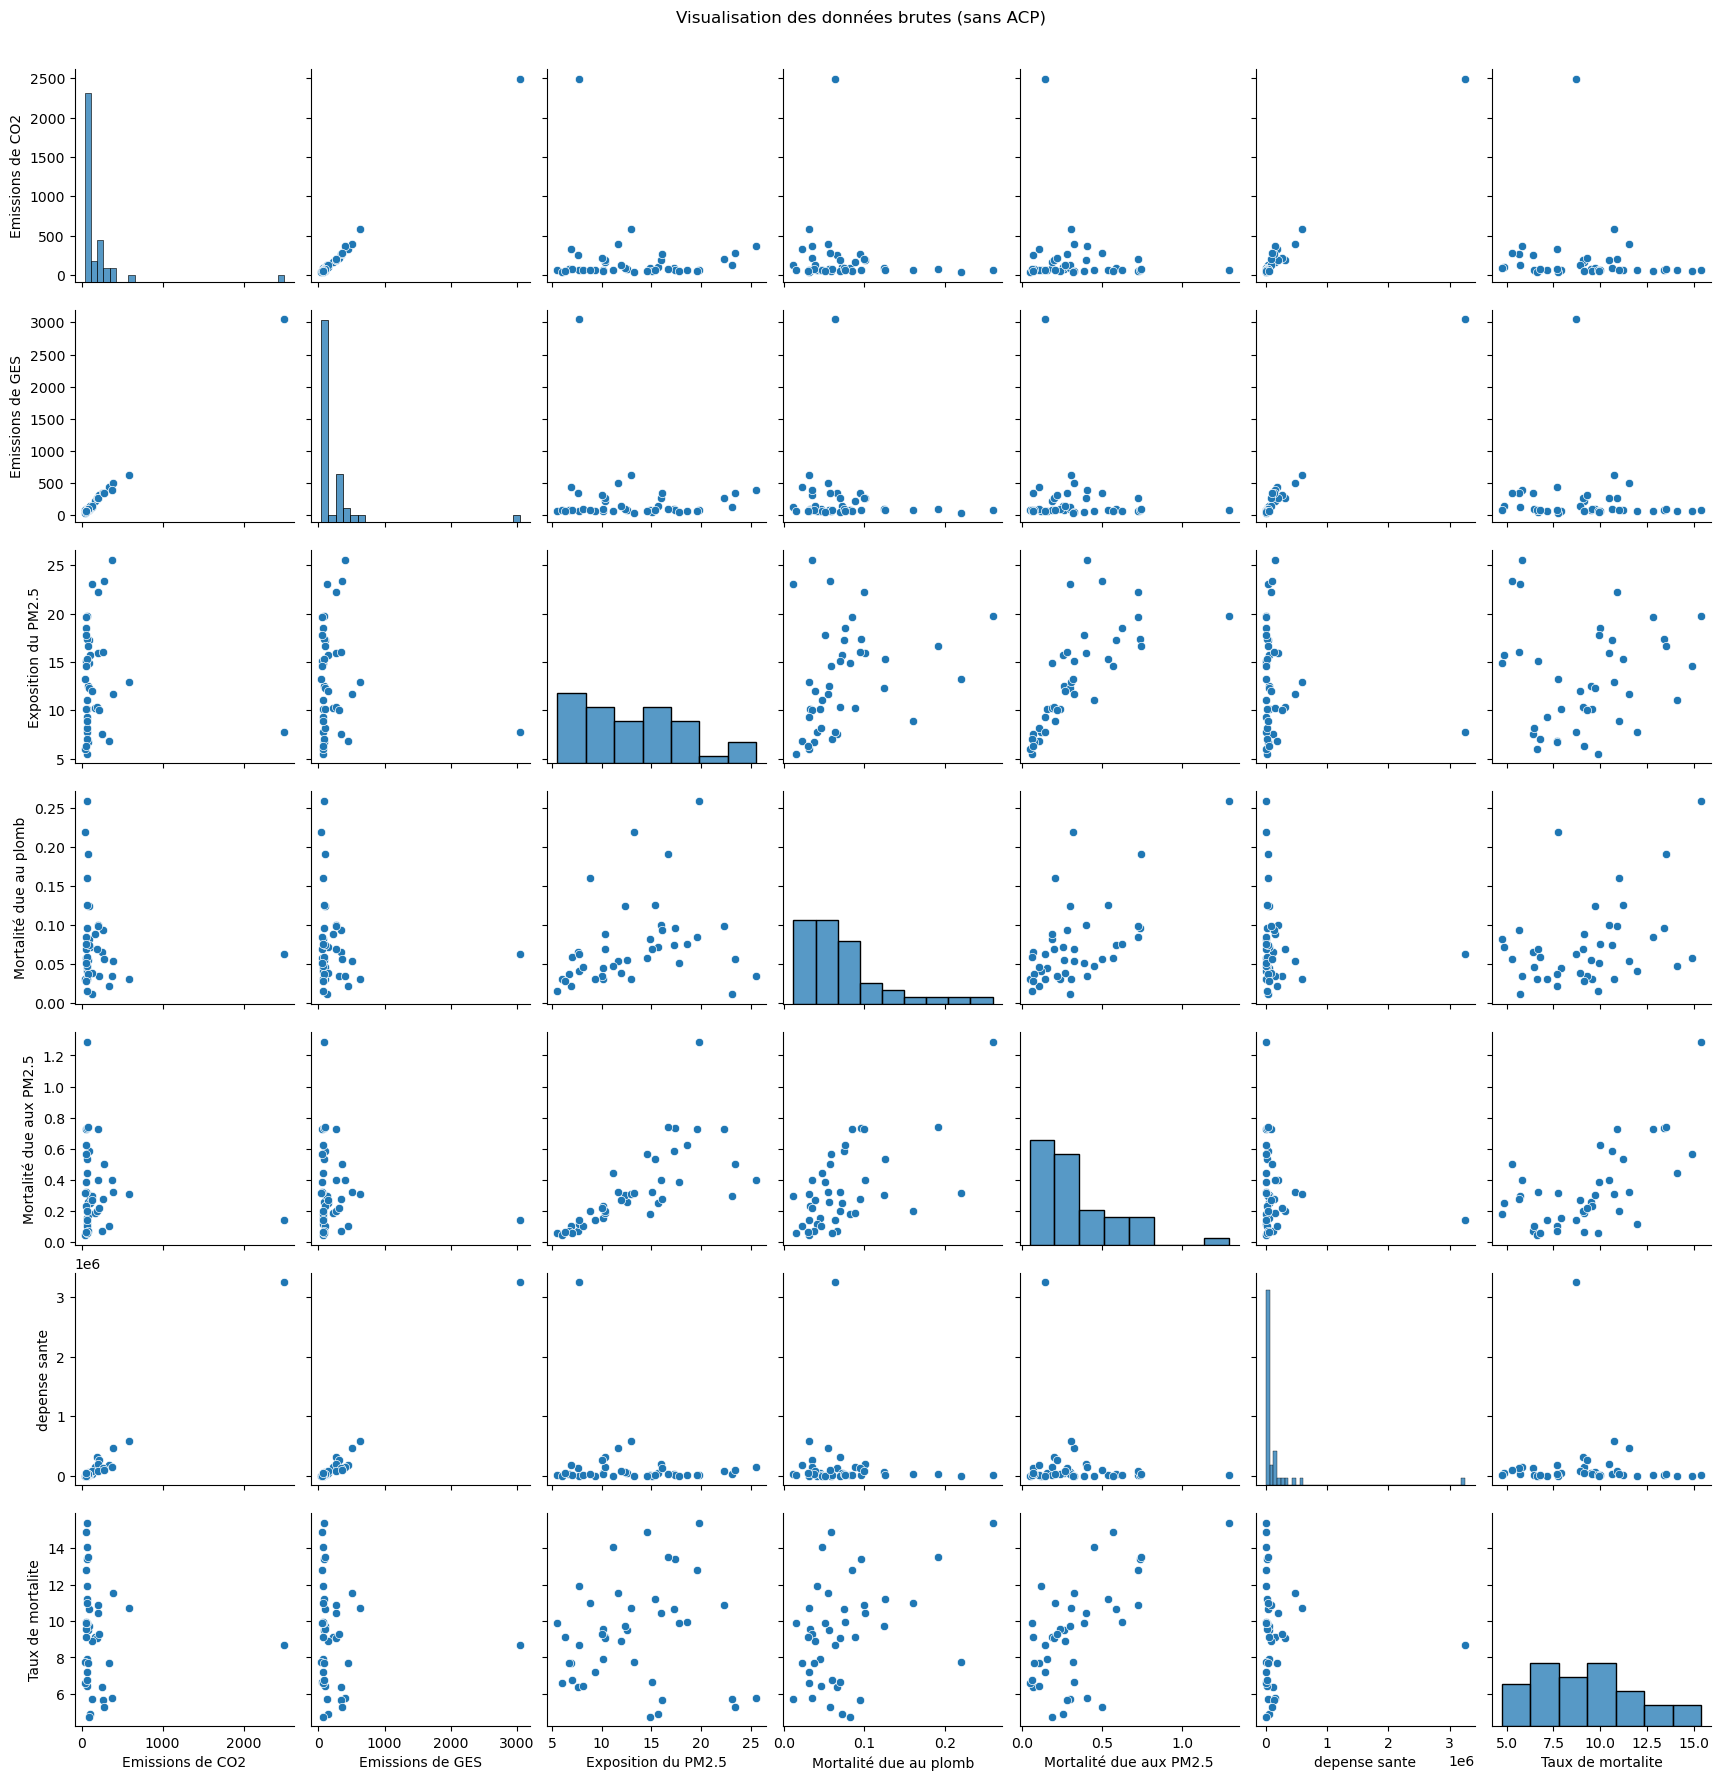

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# Sélection des indicateurs à analyser
X = data_finale_v2[["Emissions de CO2", "Emissions de GES", "Exposition du PM2.5", "Mortalité due au plomb", 
        "Mortalité due aux PM2.5", "depense sante", "Taux de mortalite"]]

# Visualisation des données sans réduction de dimension
plt.figure(figsize=(10, 6))
sns.pairplot(X)
plt.suptitle('Visualisation des données brutes (sans ACP)', y=1.02)
plt.show()

- une matrice de graphique en nuage de points pour visualiser la relation entre les différents variables de le jeu de données.
- les cases situées sur la diagonale montre le distribution de chaque variable
- les cases en dehors de la moyenne de la diagonale montre les relations entre les variables
- Par exemple, pour les émissions de CO₂, vous pourriez observer une distribution où une valeur est significativement plus grande que les autres, indiquant qu'il pourrait s'agir d'une valeur aberrante. Cela pourrait être une valeur élevée d'émissions de CO₂ dans un pays comme les États-Unis ou la Chine.
- la relation entre les émissions de CO₂ et les émissions de GES pourrait être linéaire, ce qui signifie que plus les émissions de CO₂ augmentent, plus les émissions de GES augmentent également.


#### 1. Importation des Bibliothèques

In [40]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Description et nettoyage de data:

In [41]:
data_finale_v2.head()

,Country,Emissions de CO2,Emissions de GES,Exposition du PM2.5,Mortalité due au plomb,Mortalité due aux PM2.5,depense sante,Year,Taux de mortalite
0,AUS,250.955,341.920,7.59,0.06587,0.06825,126657.898,2018,6.387
1,AUT,80.230,83.110,12.54,0.05531,0.25998,45231.436,2018,9.519
2,BEL,85.440,97.740,12.35,0.12477,0.30056,57111.479,2018,9.711
3,BGR,66.830,82.190,19.79,0.25960,1.28951,11489.321,2018,15.394
4,CAN,334.875,444.535,6.87,0.02234,0.10227,182781.747,2018,7.706


Dooner: Country, Year , Emissions de CO2, Emissions de GES,
       Exposition du PM2.5, Mortalité due au plomb,
       Mortalité due aux PM2.5, depense sante,
       Taux de mortalite

Avant d'appliquer l'ACP, il est essentiel de comprendre la nature des données, qui incluent des informations sur les émissions de CO2, les émissions de gaz à effet de serre (GES), l'exposition aux particules fines (PM2.5), la mortalité due au plomb et aux PM2.5, les dépenses de santé et les taux de mortalité. Ces variables permettent d'explorer les relations entre les facteurs environnementaux et leurs impacts sur la santé publique et l'économie.

Supprimer les colonnes non quantitatives, telles que 'Country' et 'Year' (qui est fixe en 2018), afin de se concentrer sur les indicateurs les plus pertinents pour l'analyse."

In [42]:
# Supprimer les données du pays "USA" du DataFrame
# Interprétation : Lors de la visualisation des pays en deux dimensions avec l'ACP, 
# le point représentant les données du pays "USA" est très éloigné des autres pays.
# Cela peut être dû à des valeurs extrêmes ou atypiques (outliers) dans les indicateurs analysés.
# Ces valeurs peuvent fausser la visualisation et rendre difficile l'interprétation des clusters 
# ou des relations entre les pays. Pour améliorer la qualité de la visualisation, 
# nous choisissons de supprimer ce pays.

ACP_Data = data_finale_v2[data_finale_v2["Country"] != "USA"]
ACP_Data.head()

,Country,Emissions de CO2,Emissions de GES,Exposition du PM2.5,Mortalité due au plomb,Mortalité due aux PM2.5,depense sante,Year,Taux de mortalite
0,AUS,250.955,341.920,7.59,0.06587,0.06825,126657.898,2018,6.387
1,AUT,80.230,83.110,12.54,0.05531,0.25998,45231.436,2018,9.519
2,BEL,85.440,97.740,12.35,0.12477,0.30056,57111.479,2018,9.711
3,BGR,66.830,82.190,19.79,0.25960,1.28951,11489.321,2018,15.394
4,CAN,334.875,444.535,6.87,0.02234,0.10227,182781.747,2018,7.706


In [43]:
ACP_Data = ACP_Data.drop(['Country', 'Year'], axis=1)

ACP_Data

,Emissions de CO2,Emissions de GES,Exposition du PM2.5,Mortalité due au plomb,Mortalité due aux PM2.5,depense sante,Taux de mortalite
0,250.955,341.920,7.59,0.06587,0.06825,126657.898,6.387
1,80.230,83.110,12.54,0.05531,0.25998,45231.436,9.519
2,85.440,97.740,12.35,0.12477,0.30056,57111.479,9.711
3,66.830,82.190,19.79,0.25960,1.28951,11489.321,15.394
4,334.875,444.535,6.87,0.02234,0.10227,182781.747,7.706
5,60.440,72.790,10.08,0.04513,0.15708,56165.119,7.907
6,131.070,129.525,23.07,0.01135,0.29523,39831.548,5.695
7,104.015,140.770,15.70,0.07231,0.25348,54394.337,4.870
8,88.890,75.870,14.90,0.08212,0.18321,7139.793,4.749
9,53.060,57.115,15.10,0.06972,0.32526,2135.043,6.674


#### 3. Centrage et Réduction:

- Avant l'ACP, il est essentiel de centrer et de réduire les données.
- Le centrage soustrait la moyenne de chaque variable, et la réduction divise chaque variable par son écart-type.
- Ces étapes sont cruciales pour que toutes les variables soient sur une échelle comparable, surtout lorsque les unités sont différentes, comme dans notre jeu de données (émissions, dépenses de santé, taux de mortalité).
- Cela garantit que l'ACP reflète de manière équilibrée les relations entre les variables, sans que certaines n'influencent trop l'analyse.

In [44]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(ACP_Data)

print(X_scaled[:5])  # Affiche les 5 premières lignes

[[ 0.99032269  1.24346748 -1.10112655 -0.14579076 -1.05875983  0.33445571
  -1.04165474]
 [-0.44721948 -0.5743867  -0.14749664 -0.34463016 -0.30169231 -0.31425671
   0.09258564]
 [-0.40335013 -0.47162712 -0.18410061  0.96326613 -0.14145761 -0.21961019
   0.16211762]
 [-0.56005044 -0.58084868  1.24923403  3.5020461   3.76352295 -0.58307509
   2.22019173]
 [ 1.6969476   1.96422444 -1.23983635 -0.96543841 -0.92442802  0.781586
  -0.56398454]]


**=>** Les données sont maintenant sur une échelle comparable, permettant une analyse significative.

#### 4. Calcul de la Matrice de Corrélation:

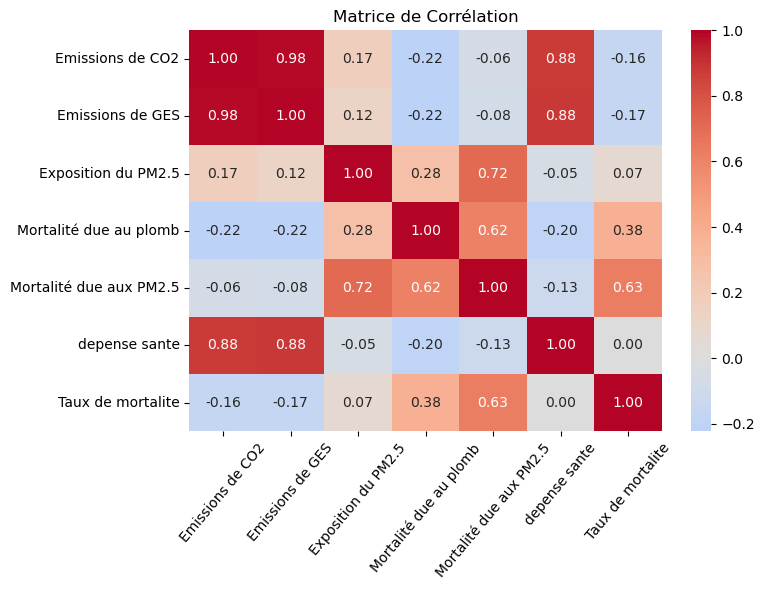

In [45]:
corr_matrix = np.corrcoef(X_scaled.T)
plt.figure(figsize=(8, 6))  # J'ai légèrement agrandi la figure pour une meilleure lisibilité
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap="coolwarm", 
            center=0, 
            fmt=".2f",
            xticklabels=ACP_Data.columns,  # Ajout des noms des variables sur l'axe x
            yticklabels=ACP_Data.columns)  # Ajout des noms des variables sur l'axe y
plt.title("Matrice de Corrélation")
plt.xticks(rotation=50)  # Rotation des labels pour une meilleure lisibilité
plt.yticks(rotation=0)
plt.tight_layout()  # Ajustement automatique de la mise en page
plt.show()

**Observation**  
- **Emissions de CO2 et Emissions de GES** : Une corrélation parfaite 0.98) montre que les émissions de CO2 contribuent fortement aux émissions de gaz à effet de serre.
- **Emissions de CO2 et Dépenses de santé** : Une forte corrélation (0.88) montre que les pays avec plus d'émissions de CO2 ont aussi des dépenses de santé plus élevées, probablement à cause des maladies liées à la pollution. 
- **Exposition au PM2.5 et Mortalité due aux PM2.5** : Une forte corrélation (0.72) indique qu'une plus grande exposition aux PM2.5 augmente la mortalité liée à ces particules.  
- **Mortalité due au plomb et Mortalité due aux PM2.5** : Une corrélation modérée (0.62) suggère que des facteurs environnementaux communs influencent ces deux types de mortalité.    
- **Taux de mortalité et Mortalité due aux PM2.5** : Une corrélation (0.63) indique que les décès dus à la pollution peuvent influencer le taux global de mortalité.  
é.  


**Interprétation**  
- **Relations directes** : Les émissions de CO2 et de GES étant fortement corrélées, toute réduction de l'une aura probablement un impact sur l'autre.  
- **Impact de la pollution sur la santé** : La forte corrélation entre l'exposition au PM2.5 et la mortalité associée confirme l'impact direct de la pollution de l'air sur la santé publique, justifiant des politiques environnementales strictes.  
- **Relation entre la pollution et les dépenses de santé** : La corrélation élevée entre les émissions de CO2 et les dépenses de santé suggère un coût économique important lié à la pollution, en raison des maladies qu'elle provoque.
- **Facteurs communs** : La corrélation modérée entre la mortalité due au plomb et celle liée aux PM2.5 indique qu'elles pourraient être influencées par des sources de pollution communes, telles que les activités industrielles ou le manque de régulation environnementale..  


#### 5. Extraction des Valeurs Propres:

In [46]:
eigenvalues, eigenvectors = np.linalg.eig(corr_matrix)
eigenvalues_rounded = np.round(eigenvalues, 2)
eigenvectors_rounded = np.round(eigenvectors, 2)

print("Valeurs propres :", eigenvalues_rounded)
print("Vecteurs propres :\n", eigenvectors_rounded)

Valeurs propres : [3.03 2.27 0.96 0.57 0.01 0.1  0.06]
Vecteurs propres :
 [[ 0.52  0.26 -0.04  0.04  0.7   0.34  0.22]
 [ 0.53  0.24  0.    0.08 -0.69  0.43 -0.03]
 [-0.07  0.48 -0.66 -0.24 -0.13 -0.3   0.42]
 [-0.29  0.37  0.12  0.85 -0.01 -0.03  0.19]
 [-0.25  0.58 -0.05 -0.17  0.13  0.17 -0.73]
 [ 0.5   0.21  0.28  0.06 -0.   -0.76 -0.22]
 [-0.22  0.36  0.69 -0.42 -0.07  0.06  0.41]]


**=>** Les valeurs propres indiquent la quantité de variance expliquée par chaque composante. Ici, la première et la deuxième composante  explique la majorité de la variance.

- **La première valeur propre:** 3.03 est nettement dominante, représentant environ 45% de la variance totale (3.03 divisé par le nombre de variables.).
- **La deuxième valeur propre:** 2.27 représente environ 32% de la variance totale.
- **La troisième valeur propre:** 0.96 représente environ 13.4% de la variance totale.
- **La quatrième valeur propre:** (0.57) représente environ 8.0% de la variance totale.
- **Les autres valeurs propres:** (0.01 et 0.06) sont très faibles, représentant ensemble moins de 3.5% de la variance totale.
- **Les dernières valeurs propres:** proches de 0 indiquent que certaines dimensions de données ne sont pas informatives.

#### 6. Illustration des Composantes Principales:

La variance expliquée par chaque composante est visualisée pour choisir le nombre optimal de composantes.

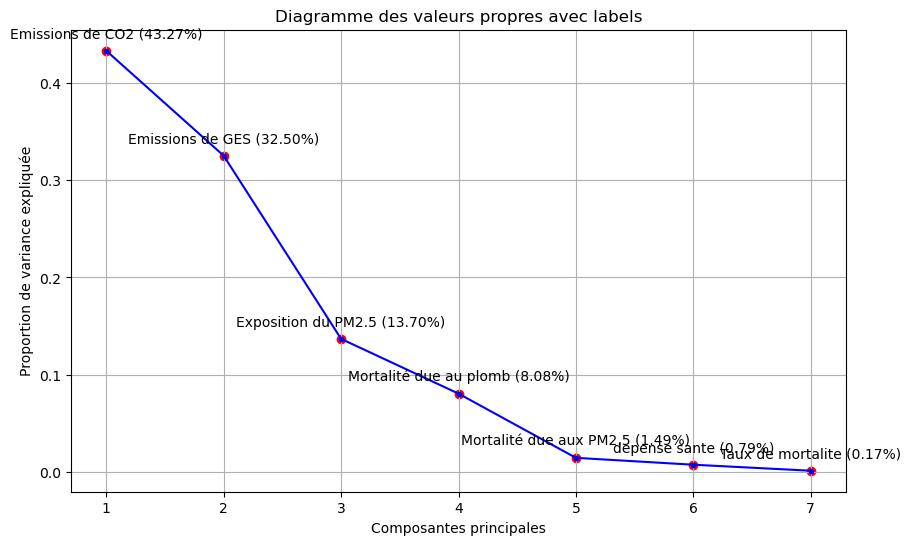

In [49]:
# Noms des colonnes comme
labels = ACP_Data.columns

pca = PCA(n_components=len(ACP_Data.columns))
pca.fit(X_scaled)


# Tracer la proportion de variance expliquée pour chaque composante
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='.', linestyle='-', color='b', label='Proportion de variance expliquée')

# Ajouter les points, valeurs et labels sur le graphique
for i, (value, label) in enumerate(zip(pca.explained_variance_ratio_, labels)):
    plt.scatter(i + 1, value, color='r')  # Ajouter un point rouge pour chaque valeur
    plt.text(i + 1, value + 0.01, f'{label} ({value*100:.2f}%)', ha='center', va='bottom', color='black')  # Ajouter le label et la valeur

# Ajouter les labels et le titre
plt.xlabel('Composantes principales')
plt.ylabel('Proportion de variance expliquée')
plt.title('Diagramme des valeurs propres avec labels')
plt.grid(True)

# Afficher le graphique
plt.show()

**Première composante (CP1) :**

- La première composante explique environ **43%** de la variance totale.
- C'est de loin la composante la plus importante. Elle capte une proportion significative de la variance des données.
- l'émission de CO2 est un facteur important capturé par la première composante.

---

**Deuxième composante (CP2) :**

- La deuxième composante explique environ **32%** de la variance totale.
- Il y a une rupture marquée dans la courbe des valeurs propres après cette composante, ce qui indique que les composantes suivantes apportent moins d'information.
- Cette composante est fortement associée aux Emissions de GES, représentant une nouvelle dimension significative, bien que moins influente que la première.

---

**Troisième composante (CP3) :**

- La troisième composante explique environ **14%** de la variance totale.
- Bien que significative, cette composante contribue beaucoup moins à la variance totale par rapport aux deux premières. Elle peut refléter une variabilité moins pertinente dans les données.
- Cette composante pourrait refléter des variations spécifiques liées à l'exposition au PM2.5, une mesure clé des particules fines dans l'air.

---

**Composantes 4 à 7 (CP4 à CP7) :**
- La CP4 explique environ **8.0%** de la variance, tandis que les CP5 à CP7 représentent ensemble moins de **3.5%**.
- La CP4, bien que légèrement significative, apporte une faible quantité d'information à l'ensemble des données. Les CP5 à CP7, quant à elles, expliquent très peu de variance et peuvent être considérées comme du bruit statistique, n'ajoutant pratiquement aucune information utile.

---

**Conclusions :**

- Après la troisième composante suggère de retenir **2 composantes principales**.
- Ces **2** composantes expliquent environ **75%** de la variance totale, ce qui est un excellent résultat.
- La réduction de dimension de **7 à 2** variables est donc très pertinente, permettant une représentation efficace des données tout en conservant une grande partie de l'information sans perte significative.


In [50]:
# Calcul de la variance expliquée cumulée
variance_cumulee = np.cumsum(pca.explained_variance_ratio_)

# Choisir n pour atteindre 75% de variance expliquée
n = np.argmax(variance_cumulee >= 0.75) + 1  # Ajouter 1 car l'indice commence à 0

print(f"Le nombre de composantes principales pour expliquer 75% de la variance est : {n}")

Le nombre de composantes principales pour expliquer 75% de la variance est : 2


#### 7. Application de l'ACP:

##### 1. On réduit les données à deux dimensions principales pour simplifier l'analyse

In [54]:
# Application de l'ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

Le choix de 2 composantes principales permet d'expliquer environ 75% de la variance totale, conservant ainsi l'essentiel de l'information. Cela réduit la dimensionnalité tout en facilitant la visualisation et le traitement des données.

##### 2. Affichage des nouvelles données projetées sur les composantes principales.

In [55]:
print("Nouvelles données après ACP :")
print(X_pca[:10])

Nouvelles données après ACP :
[[ 1.95351833 -0.94433133]
 [-0.52754631 -0.65952888]
 [-0.83493337 -0.01411246]
 [-3.4205302   4.47563398]
 [ 3.03620733 -0.61914838]
 [-0.29039513 -1.44437319]
 [ 0.20548828 -0.23832513]
 [ 0.06297768 -0.70512825]
 [-0.39548708 -1.10740406]
 [-0.86953717 -0.71878653]]


Les données après ACP montrent les nouvelles coordonnées des points (représentant différents countries) dans un espace réduit à deux dimensions, permettant de simplifier la structure des données tout en préservant l'information clé. Les valeurs indiquent comment chaque pays se positionne par rapport aux composantes principales.

In [52]:
# Application de l'ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

Le choix de 2 composantes principales permet d'expliquer environ 75% de la variance totale, conservant ainsi l'essentiel de l'information. Cela réduit la dimensionnalité tout en facilitant la visualisation et le traitement des données.

##### 3.Visualisation des données dans l'espace des deux premières composantes principales.

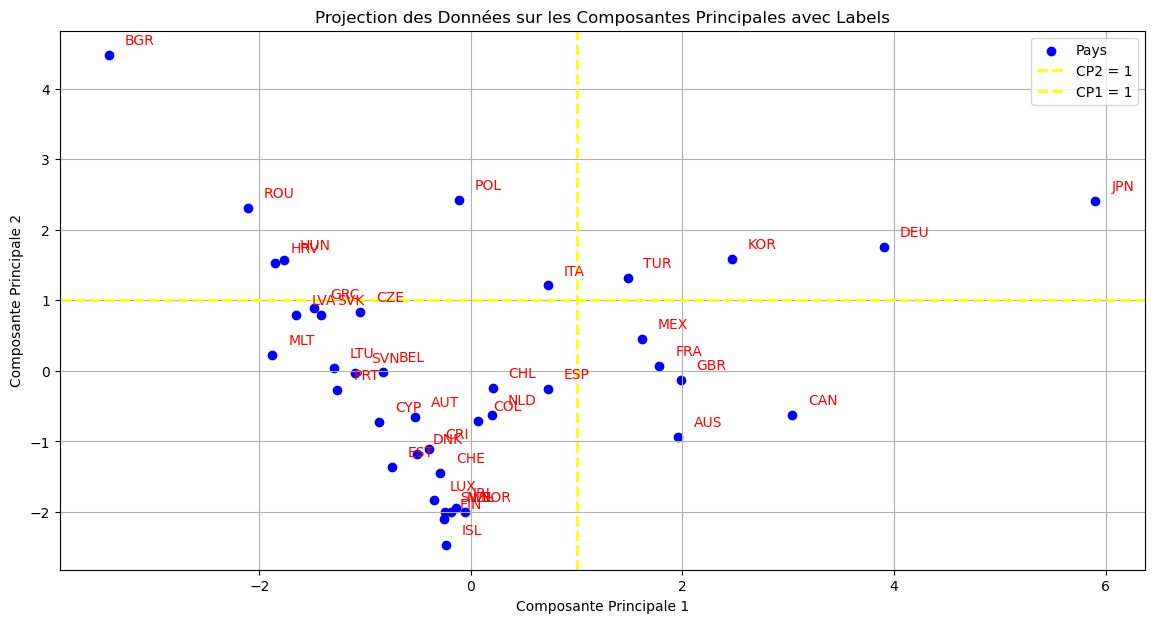

In [56]:
countries = [
    "AUS", "AUT", "BEL", "BGR", "CAN", "CHE", "CHL", "COL", "CRI", "CYP",
    "CZE", "DEU", "DNK", "ESP", "EST", "FIN", "FRA", "GBR", "GRC", "HRV",
    "HUN", "IRL", "ISL", "ITA", "JPN", "KOR", "LTU", "LUX", "LVA", "MEX",
    "MLT", "NLD", "NOR", "NZL", "POL", "PRT", "ROU", "SVK", "SVN", "SWE",
    "TUR"
]

# Création de la figure
plt.figure(figsize=(14, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', label='Pays')

# Ajout des labels pour chaque point
for i, country in enumerate(countries):
    plt.text(X_pca[i, 0] + 0.15, X_pca[i, 1] + 0.15, country, fontsize=10, color='red')

# Configuration des axes et du titre
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Projection des Données sur les Composantes Principales avec Labels')
plt.grid()

# Ajout des lignes CP1=0 et CP2=0
plt.axhline(1, color='yellow', linestyle='--', linewidth=2, label='CP2 = 1')
plt.axvline(1, color='yellow', linestyle='--', linewidth=2, label='CP1 = 1')
plt.legend()
plt.show()

**=>** Ce graphique montre comment les données sont regroupées et distribuées selon les trois composantes principales.

- Axe X (CP1) : La Composante Principale 1 (CP1), qui explique la majeure partie de la variance des données.
- Axe Y (CP2) : La Composante Principale 2 (CP2), qui explique une proportion importante de la variance, mais moins que CP1.

Lignes de référence :
- La ligne verticale à CP1 = 1 et la ligne horizontale à CP2 = 1 divisent le graphique en quatre quadrants.
- Ces lignes utilisées pour repérer des groupes de pays en fonction de leur position par rapport à ces seuils.

----

Analyse par quadrants :
- Secteur  supérieur droit -> JPN (Japon) se distingue nettement par des valeurs très élevées pour CP1 et CP2. Cela indique des caractéristiques uniques selon les variables projetées.
- Secteur  inférieur droit -> Des pays comme FRA (France) et GBR (United Kingdom) etc apparaissent ici. Ils partagent des similarités caracteristique.
- Secteur  supérieur gauche -> ROU (Roumanie), BGR (Bulgarie), POL (Pologne) etc, Ces pays se distinguent par une forte contribution sur la composante CP2, mais des valeurs plus faibles sur CP1, ce qui pourrait refléter des spécificités régionales ou des politiques ciblées.
- Secteur  inférieur droit -> CAN (Canada), AUS (Australie), FRA (France), GBR (Royaume-Uni), DEU (Allemagne). Ces pays montrent une forte contribution sur CP1, mais des valeurs modérées sur CP2. Cela peut refléter des économies développées, mais moins d'impact sur certains aspects sociaux ou environnementaux.

---

 Points clés et pays remarquables :
- JPN (Japon) : Un cas isolé qui mérite une analyse approfondie.
- BGR (Bulgarie) : Très élevé sur CP2, mais faible sur CP1, indiquant une spécificité locale ou régionale.

---

Clusters (regroupements) :
- Les pays d'Europe de l'Est (LVA, SVK, CZE, etc.) forment un groupe cohérent, indiquant des caractéristiques similaires, Ces pays partagent des valeurs comparables dans les indicateurs de pollution (émissions de CO2, PM2.5) et de santé (mortalité due aux PM2.5, dépenses de santé), ce qui suggère des défis communs en matière de pollution de l'air et de systèmes de santé.
- Les pays développés (CAN, AUS, FRA, GBR) se regroupent dans le quadrant inférieur droit, partageant des caractéristiques similaires. Ces pays ont des valeurs similaires dans les indicateurs de pollution et de santé. 

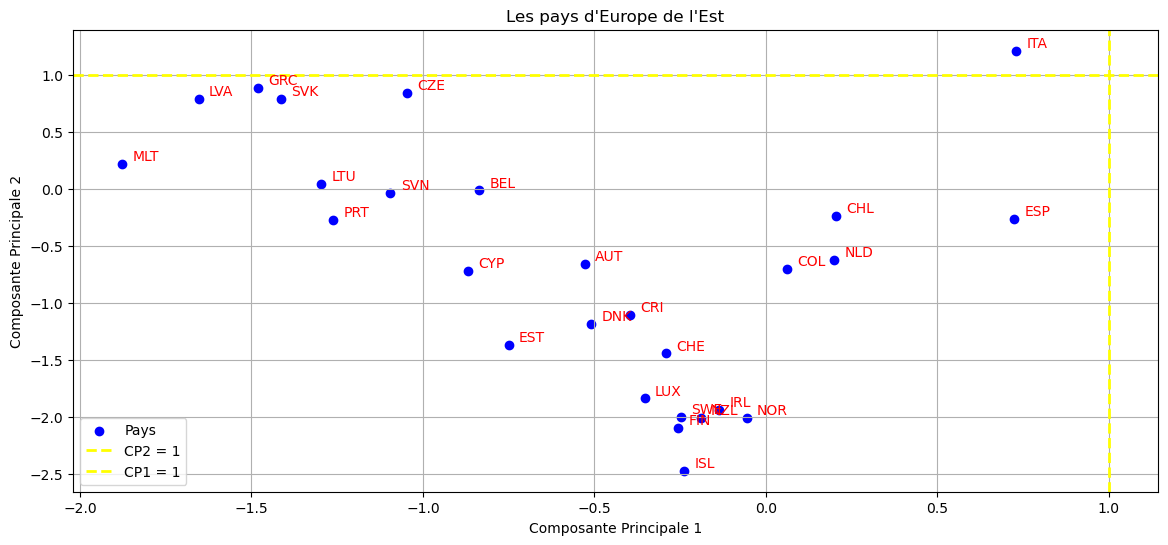

In [58]:
# Filtrer les indices où CP1 est entre -2 et -1 et CP2 est entre -3 et 1
indices_filtrés = np.where((X_pca[:, 0] >= -2) & (X_pca[:, 0] <= 1.5) & (X_pca[:, 1] >= -3) & (X_pca[:, 1] <= 1.3))

# Filtrer les données
X_pca_filtré = X_pca[indices_filtrés]
countries_filtrés = [countries[i] for i in indices_filtrés[0]]

# Création de la figure
plt.figure(figsize=(14, 6))

# Afficher les points filtrés
plt.scatter(X_pca_filtré[:, 0], X_pca_filtré[:, 1], c='blue', label='Pays')

# Ajouter les labels pour chaque pays filtré
for i, country in enumerate(countries_filtrés):
    plt.text(X_pca_filtré[i, 0] + 0.03, X_pca_filtré[i, 1] + 0.03, country, fontsize=10, color='red')

# Configuration des axes et du titre
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Les pays d\'Europe de l\'Est')
plt.grid()

# Ajouter des lignes CP1=0 et CP2=0
plt.axhline(1, color='yellow', linestyle='--', linewidth=2, label='CP2 = 1')
plt.axvline(1, color='yellow', linestyle='--', linewidth=2, label='CP1 = 1')
plt.legend()

# Afficher le graphique
plt.show()

Les pays d'Europe de l'Est partagent probablement des caractéristiques socio-économiques similaires (telles que des modèles économiques émergents ou des systèmes de santé en développement) et sont impactés par des niveaux de pollution modérés, comme l'indiquent leurs positions sur le graphique.

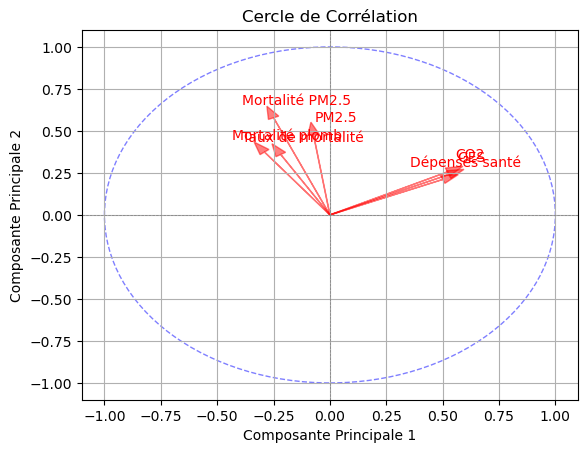

In [59]:
# Liste des variables correspondant à chaque composante principale
variables = [
    "CO2", "GES", "PM2.5", 
    "Mortalité plomb", "Mortalité PM2.5", "Dépenses santé", "Taux de mortalité"
]

# Supposons que 'pca' soit votre modèle PCA
components = pca.components_

# Tracer les flèches des composantes principales
for i, (x, y) in enumerate(components.T):
    plt.arrow(0, 0, x, y, color='r', alpha=0.5, head_width=0.05)
    offset = 0.1  # Vous pouvez ajuster cette valeur pour éloigner davantage les textes
    # Ajouter le texte avec le nom de la variable
    plt.text(x + offset, y + offset, f"{variables[i]}", color='r', ha='center', va='center')

# Tracer un cercle de corrélation
circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='--', alpha=0.5)
plt.gca().add_artist(circle)

# Ajuster les limites et ajouter des labels
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Cercle de Corrélation')
plt.grid()
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)

# Afficher le graphique
plt.show()

Le cercle montre les deux premières composantes principales, qui expliquent une partie importante de la variance des données initiales.
- **CP1** semble capturer des facteurs associés à l'industrialisation, avec une forte corrélation entre les émissions de CO2, les émissions de GES et les dépenses de santé.
- **CP2** semble principalement lié à des facteurs environnementaux, en particulier la pollution de l'air (PM2.5) et ses conséquences sanitaires (mortalité due aux PM2.5), tout en capturant une relation avec la mortalité générale.



**Emissions de CO2, Emissions de GES, et Dépenses de Santé :**  
Ces variables sont fortement corrélées, avec **CP1** capturant leur relation. Les pays développés et industrialisés tels que **AUS**, **CAN**, **DEU**, et **FRA** montrent des émissions élevées de CO2 et de GES, souvent associées à des dépenses de santé plus importantes. Cela suggère un lien entre industrialisation, pollution et systèmes de santé coûteux.

**Exposition au PM2.5 et Mortalité due aux PM2.5 :**  
Ces deux variables sont également corrélées, avec **CP2** reflétant l'impact de la pollution de l'air sur la santé. Les pays comme **CHL**, **COL**, et **DNK** ayant une forte exposition au PM2.5 qui influnce sur la  mortalité plus élevée, mettant en évidence l'impact de la pollution de l'air sur la santé publique.

**Mortalité due au plomb et Taux de mortalité :**  
Ces variables sont modérément corrélées, avec **CP2** montrant une relation positive avec le taux de mortalité. Les pays tels que **BGR**, *POLN**, et **ROU**, avec un taux de mortalité élevé, sont également confrontés à des problèmes environnementaux comme la pollution par le plomb.


### Conclusion :
Grâce à l'Analyse en Composantes Principales (ACP), nous avons réussi à simplifier des données complexes en identifiant les relations clés entre les facteurs environnementaux et sanitaires. Cette méthode a permis de réduire la dimension des données de 7 à 2 tout en conservant leur signification essentielle.

- **Les émissions de CO2, GES et dépenses de santé** sont fortement liées, surtout dans les pays développés (AUS, CAN, DEU, FRA).
- **La pollution de l'air (PM2.5)** a un impact significatif sur **la mortalité** dans des pays comme CHL, COL, DNK.
- **Les problèmes liés au plomb** contribuent à des **taux de mortalité** élevés dans des pays comme BGR, POL, ROU.


# Partie 5: Test Hypothèse 

## Tests Paramétriques

### Test t de Student a un seul echantillon :

#### I- Problématique :

Dans le cadre de l'analyse de l'impact de la pollution sur la santé, il est essentiel de déterminer si le taux de mortalité dans certains pays dépasse un seuil de référence mondial. Ce seuil, représentant un taux de mortalité acceptable, sera utilisé comme valeur de comparaison. À l'aide du test t de Student unilatéral à droite, nous souhaitons tester l'hypothèse selon laquelle le taux de mortalité dans un pays donné est significativement supérieur à cette valeur de référence.

#### II- Conditions pour le test t de student :

##### Étape 1 : Taille de l'échantillon :

In [4]:
# Vous pouvez maintenant l'utiliser à nouveau
taille = len(data_finale_v2)
print(taille)

42


Interpretation: puisque la taille plus grand 30 donc condition verifier

##### Étape 2 : Vérifier la normalité des données

In [27]:
from scipy.stats import shapiro



# Extraire la colonne 'OBS_VALUE' pour le test de Shapiro
data = data_finale_v2['Taux de mortalite']

# Effectuer le test de Shapiro-Wilk
stat, p_value = shapiro(data)

# Afficher les résultats
print('Statistique de Shapiro-Wilk:', stat)
print('P-value:', p_value)

# Interprétation du test
if p_value > 0.05:
    print("Les données suivent une distribution normale (p > 0.05)")
else:
    print("Les données ne suivent pas une distribution normale (p <= 0.05)")

Statistique de Shapiro-Wilk: 0.9700006452860365
P-value: 0.3302653906244194
Les données suivent une distribution normale (p > 0.05)


---
**Statistique de Shapiro-Wilk : 0.968** Cela indique que les données sont proches d'une distribution normale, car une statistique proche de 1 suggère une bonne adéquation avec une distribution normale.

**P-value : 0.307** La p-value de 0.307 est supérieure à 0.05, ce qui signifie qu'il n'y a pas de preuve suffisante pour rejeter l'hypothèse nulle.

**Conclusion** Comme la p-value est supérieure à 0.05, nous ne rejetons pas l'hypothèse nulle. Cela signifie que les données suivent une distribution normale.

#### III- Formulation de l'hypothèse :

**Hypothèse nulle (H₀) :** 
 Le taux de mortalité observé est inférieur ou égal  à la valeur de Référence mondiale pour le taux de mortalité.

**Hypothèse alternative (H₁) :**
Le taux de mortalité dans le pays étudié est plus élevé que la valeur de référence mondiale pour le taux de mortalité.

#### VI- Test et Interpretation :

In [6]:
data_finale_v2.head()

,Country,Emissions de CO2,Emissions de GES,Exposition du PM2.5,Mortalité due au plomb,Mortalité due aux PM2.5,depense sante,Year,Taux de mortalite
0,AUS,250.955,341.920,7.59,0.06587,0.06825,126657.898,2018,6.387
1,AUT,80.230,83.110,12.54,0.05531,0.25998,45231.436,2018,9.519
2,BEL,85.440,97.740,12.35,0.12477,0.30056,57111.479,2018,9.711
3,BGR,66.830,82.190,19.79,0.25960,1.28951,11489.321,2018,15.394
4,CAN,334.875,444.535,6.87,0.02234,0.10227,182781.747,2018,7.706


**Taux_mortalite_Reference** : Référence mondiale pour les taux de mortalité liés à la pollution, utilisée pour comparer les données locales.  
**Test t de Student** : Test statistique pour vérifier si les dépenses de santé de l'échantillon diffèrent significativement de la référence mondiale.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, ttest_1samp

# Référence mondiale pour le taux de mortalité (par exemple, moyenne globale) en décès pour 1000 habitants
Taux_mortalite_Reference = 8.000  # décès pour 1000 habitants

# Effectuer un test t pour comparer le taux de mortalité à la référence mondiale
stat, p_value = ttest_1samp(data_finale_v2["Taux de mortalite"], Taux_mortalite_Reference)

In [29]:
# Utiliser la valeur absolue de la statistique t pour éviter les signes négatifs
t_calculer = abs(stat)

# Paramètres
df = taille - 1

alpha = 0.05

# Valeur critique pour un test unilatéral
t_critique = t.ppf(1 - alpha, df)

# Afficher les résultats
print("t_calculer  :", t_calculer)
print("t_critique  :", t_critique)

t_calculer  : 2.9314239114680527
t_critique  : 1.6828780021327079


- **t_calculé (t_calculer)** : 2.89
- **t_critique (t_critique)** : 1.68

Puisque **t_calculé (2.89)** est supérieur à **t_critique (1.68)**, nous pouvons conclure que la différence entre le taux de mortalité de l'échantillon et la référence est **statistiquement significative**. 

Cela signifie que le taux de mortalité dans ce pays est **significativement plus élevé** que la valeur de référence, avec un certain degré de confiance.

In [30]:
# Test basé sur t_calculé et t_critique
if t_calculer > t_critique:
    print("On rejette H0 , accepte H1 : Le taux de mortalité dans le pays étudié est plus élevé que la valeur de référence mondiale")
else:
    print("On accepte H0 : Le taux de mortalité observé est égal ou inférieur à la valeur de référence mondiale")

On rejette H0 , accepte H1 : Le taux de mortalité dans le pays étudié est plus élevé que la valeur de référence mondiale


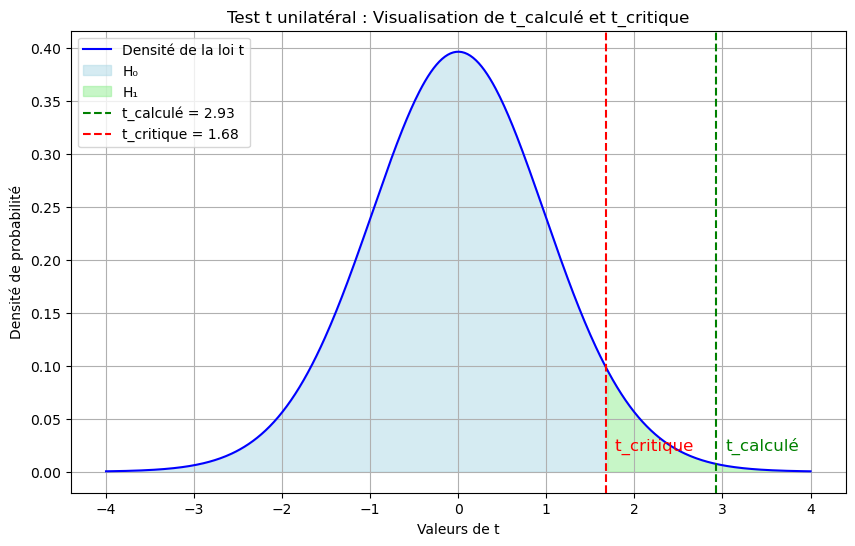

In [31]:
# Générer les valeurs de t pour la courbe de la distribution
t_values = np.linspace(-4, 4, 500)

# Calculer la densité de probabilité pour chaque valeur de t
pdf = t.pdf(t_values, df)

# Tracé de la courbe
plt.figure(figsize=(10, 6))
plt.plot(t_values, pdf, label="Densité de la loi t", color="blue")

# Région de H₀ (avant t_critique)
plt.fill_between(t_values, 0, pdf, where=(t_values < t_critique), color="lightblue", alpha=0.5, label="H₀")

# Région de H₁ (après t_critique)
plt.fill_between(t_values, 0, pdf, where=(t_values >= t_critique), color="lightgreen", alpha=0.5, label="H₁")

# Ligne pour la statistique t
plt.axvline(abs(stat), color="green", linestyle="--", label=f"t_calculé = {abs(stat):.2f}")

# Ligne pour la valeur critique
plt.axvline(t_critique, color="red", linestyle="--", label=f"t_critique = {t_critique:.2f}")

# Annotations pour t_critique et t_calculé
plt.text(t_critique + 0.1, 0.02, "t_critique ", color="red", fontsize=12)
plt.text(abs(stat) + 0.1, 0.02, "t_calculé", color="green", fontsize=12)

# Légendes et titres
plt.title("Test t unilatéral : Visualisation de t_calculé et t_critique")
plt.xlabel("Valeurs de t")
plt.ylabel("Densité de probabilité")
plt.legend()
plt.grid()

# Affichage
plt.show()

**Interpretation:**

**Zone de H₀ (en bleu clair) :** Cette zone représente les valeurs de t pour lesquelles l'hypothèse nulle H₀ est acceptée.
**Zone de H₁ (en vert clair) :** Cette zone représente les valeurs de t pour lesquelles l'hypothèse alternative H₁ est acceptée.
**t_calculé (ligne verte pointillée) :** La ligne verte représente la statistique t calculée à partir des données observées.
**t_critique (ligne rouge pointillée) :** La ligne rouge représente la valeur critique (t_critique), qui marque la frontière entre l'acceptation de H₀ et le rejet en faveur de H₁.

t_calculé étant supérieur à t_critique, cela signifie que nous rejetons H₀ et acceptons H₁. Cela suggère que les taux de mortalité observés dans le pays étudié sont significativement plus élevés que la valeur de référence mondiale

**conclusion**:

Le taux de mortalité observé dépasse la valeur de référence, suggérant un impact significatif lié à la pollution. Cela met en évidence l'importance de prendre en compte les niveaux de pollution, comme les émissions de CO2 et l'exposition au PM2.5, dans l'évaluation des risques sanitaires. Un taux de mortalité plus élevé peut indiquer des conditions environnementales défavorables, nécessitant une exploration plus approfondie pour orienter les politiques de santé publique et de gestion de la pollution.

## Tests non Paramétriques

### Test de Mann-Whitney U :

***Problématique***
- Existe-t-il une différence significative dans le taux de mortalité entre les pays ayant des émissions de CO2 faibles et élevées ?

- Pour répondre à cette problématique, nous utilisons un test non paramétrique approprié ***test de Mann-Whitney U***, qui permet de comparer **deux groupes indépendants**.

- **H0** : Les deux groupes ont la meme distribution des taux de mortalite .
- **H1** : Les deux groupes ont des distributions differentes des taux de mortalite

***Etap1:*** *Importation des bibliothèques et chargement des données*

In [68]:
import pandas as pd
import scipy.stats as stats

# Charger les données
data = data_final_v2
data.head()  # Afficher les premières lignes pour vérifier le chargement des données


,Country,Emissions de CO2,Emissions de GES,Exposition du PM2.5,Mortalité due au plomb,Mortalité due aux PM2.5,depense sante,Year,Taux de mortalite
0,AUS,250.955,341.920,7.59,65.87,68.25,126657.898,2018,6.387
1,AUT,80.230,83.110,12.54,55.31,259.98,45231.436,2018,9.519
2,BEL,85.440,97.740,12.35,124.77,300.56,57111.479,2018,9.711
3,BGR,66.830,82.190,19.79,259.60,1289.51,11489.321,2018,15.394
4,CAN,334.875,444.535,6.87,22.34,102.27,182781.747,2018,7.706


***Etap2 :*** *Division des groupes selon la médiane des émissions de CO2*

In [70]:
# Division des groupes selon la médiane des émissions de CO2

    # Calculer la médiane des émissions de CO2
median_co2 = data['Emissions de CO2'].median()

# Diviser les pays en deux groupes
    # Pays avec des émissions de CO2 inférieures ou égales à la médiane.
group_low_co2 = data[data['Emissions de CO2'] <= median_co2]['Taux de mortalite']
    # Pays avec des émissions de CO2 supérieures à la médiane.
group_high_co2 = data[data['Emissions de CO2'] > median_co2]['Taux de mortalite']

# Vérification des tailles des groupes
print("Taille du groupe faible CO2 :", len(group_low_co2))
print("Taille du groupe élevé CO2 :", len(group_high_co2))

Taille du groupe faible CO2 : 21
Taille du groupe élevé CO2 : 21


***Etap3:*** *Test statistique (Mann-Whitney U)*

In [74]:
# Effectuer le test de Mann-Whitney U
w_stat, p_valeur = stats.mannwhitneyu(group_low_co2, group_high_co2, alternative='two-sided')

# Afficher les résultats
print("Statistique de Wilcoxon =", w_stat)
print("p_valeur =", p_valeur)


Statistique de Wilcoxon = 315.0
p_valeur = 0.018047625262461266


***Etap4:*** *Interprétation des résultats*

In [76]:
# Fixer le seuil de signification
alpha = 0.05

# Interpréter les résultats
if p_valeur > alpha:
    print("On accepte H0 : Il n'y a pas de différence significative entre les taux de mortalité des deux groupes.")
else:
    print("On rejette H0 : Il existe une différence significative entre les taux de mortalité des deux groupes.")


On rejette H0 : Il existe une différence significative entre les taux de mortalité des deux groupes.


# Partie 6: Classification Automatique

## Classification ascendante hiérarchique :

### Problématique 
Les principales problématiques traitées par cette analyse concernent les liens entre l'environnement, les émissions de ***CO2*** et ***GES***, l'exposition à la pollution de l'air, et les taux de mortalité. 

***L'objectif*** est d'identifier des groupes de pays qui partagent des défis similaires en matière d'environnement et de santé publique

***Etap1:*** *Importation des bibliothèques nécessaires et Création du DataFrame*

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import scipy.cluster.hierarchy as shc

In [107]:
df = pd.DataFrame(data_final_v2)

# Affichage des premières lignes
df.head()

,Country,Emissions de CO2,Emissions de GES,Exposition du PM2.5,Mortalité due au plomb,Mortalité due aux PM2.5,depense sante,Year,Taux de mortalite
0,AUS,250.955,341.920,7.59,65.87,68.25,126657.898,2018,6.387
1,AUT,80.230,83.110,12.54,55.31,259.98,45231.436,2018,9.519
2,BEL,85.440,97.740,12.35,124.77,300.56,57111.479,2018,9.711
3,BGR,66.830,82.190,19.79,259.60,1289.51,11489.321,2018,15.394
4,CAN,334.875,444.535,6.87,22.34,102.27,182781.747,2018,7.706


***Etap2:*** *Sélection des colonnes numériques (celles qui seront utilisées dans l'analyse)*

In [110]:

features = ['Emissions de CO2', 'Emissions de GES', 'Exposition du PM2.5', 'Taux de mortalite']
df_features = df[features] 


***Etap3:*** *Standardisation des données*

In [113]:
scaler = StandardScaler()  # L'objet StandardScaler permet de normaliser les données.
df_features_scaled = scaler.fit_transform(df_features)  # Transformation des données avec la normalisation.


- La standardisation permet de mettre toutes les variables sur une même échelle pour que l'analyse PCA et le clustering ne soient pas biaisés par les différences d'échelle

***Etap4:*** *Réduction de dimensions avec PCA (Principal Component Analysis)*

In [120]:
pca = PCA(n_components=2)  
pca_components = pca.fit_transform(df_features_scaled)  

- réduit les données à deux dimensions principales, ce qui permet une visualisation et une interprétation plus faciles des relations entre les variables.

***Etap5:*** *Affichage de la variance expliquée par chaque composant principal*

In [127]:
explained_variance_ratio = pca.explained_variance_ratio_  # Calcul de la variance expliquée par chaque composant.
print(f"Variance expliquée : {explained_variance_ratio}")

Variance expliquée : [0.50952782 0.25952377]


***0.50952782+0.25952377=0.7691 (≈77%)***

La ***PCA*** (Analyse en Composantes Principales) a permis de réduire les données initiales, qui comportaient un grand nombre de dimensions, à seulement deux dimensions tout en conservant ***77%*** de l'information initiale. Bien que cette réduction entraîne une perte de ***23%*** de l'information, une rétention de ***77%*** est généralement considérée comme suffisante pour des tâches telles que le clustering ou la visualisation.

***Etap6:*** *Visualisation des clusters dans l'espace des 2 premières composantes principales*

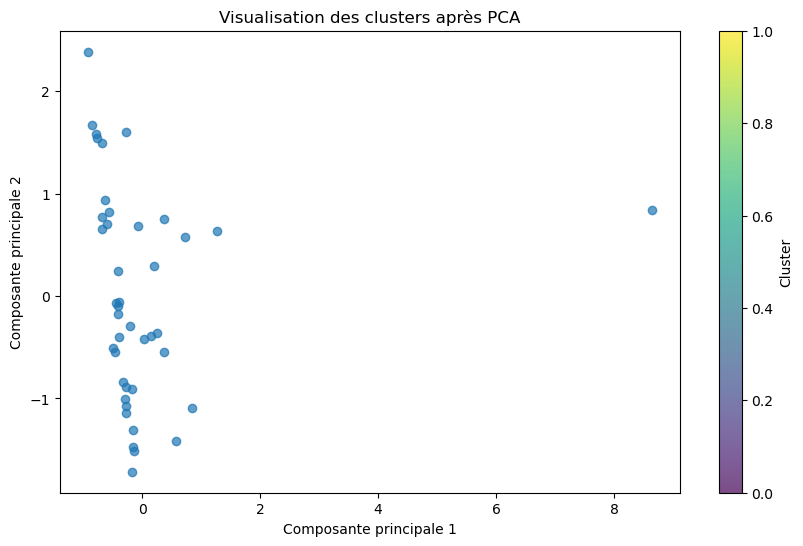

In [131]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], alpha=0.7)  # Visualisation des données projetées sur 2D.
plt.title("Visualisation des clusters après PCA")
plt.xlabel("Composante principale 1")  # Label de l'axe 
plt.ylabel("Composante principale 2") 
plt.colorbar(label="Cluster")  # Ajouter une légende pour les clusters.
plt.show()  


***Etap7:*** *Clustering hiérarchique avec la méthode 'ward' (minimisation de la variance inter-cluster)*

In [134]:
linked = linkage(pca_components, method='ward')

***Etap8:*** *Visualisation du dendrogramme pour explorer la structure hiérarchique des clusters*

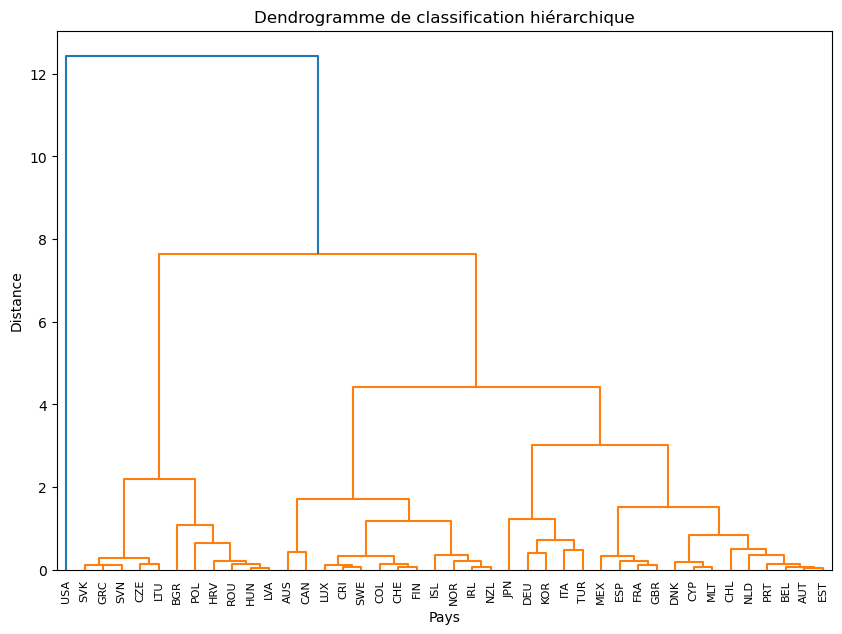

In [137]:
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=df['Country'].values, leaf_rotation=90)  
plt.title("Dendrogramme de classification hiérarchique")
plt.xlabel('Pays') 
plt.ylabel('Distance') 
plt.show()

***Etap9:*** *Autre visualisation du dendrogramme avec une ligne de découpe pour choisir le nombre de clusters*

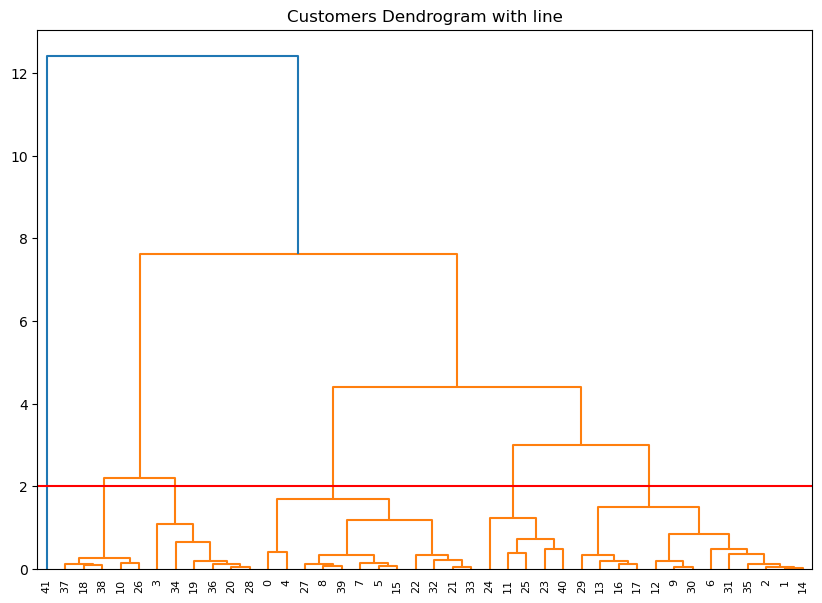

In [142]:
plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram with line")
clusters = shc.linkage(pca_components, method='ward', metric="euclidean")  # Calcul des liens hiérarchiques
shc.dendrogram(clusters)  # Affichage du dendrogramme
plt.axhline(y = 2, color = 'r', linestyle = '-')  # Ligne de découpe rouge à hauteur y=2 pour définir les clusters
plt.show()

***Interprétation de la ligne horizontale (en rouge) dans le dendrogramme :***
- La ligne rouge à hauteur 2 signifie que les clusters sont séparés à cette distance.
 
- Par exemple, si cette ligne coupe 5 branches, cela signifie qu'il y a 5 clusters distincts.


***Etap10:*** *Détermination du nombre de clusters à partir du dendrogramme*

In [146]:
num_clusters = 5  
cluster_labels = fcluster(linked, num_clusters, criterion='maxclust')  

# Ajout des labels des clusters dans le DataFrame
df['Cluster'] = cluster_labels


Cette ligne définit que le nombre de clusters que l'on souhaite obtenir après le clustering hiérarchique est de 5. Cela signifie qu'on veut diviser l'ensemble des données en 5 groupes distincts.

***Etap11:*** *Visualisation des clusters après l'assignation des labels*

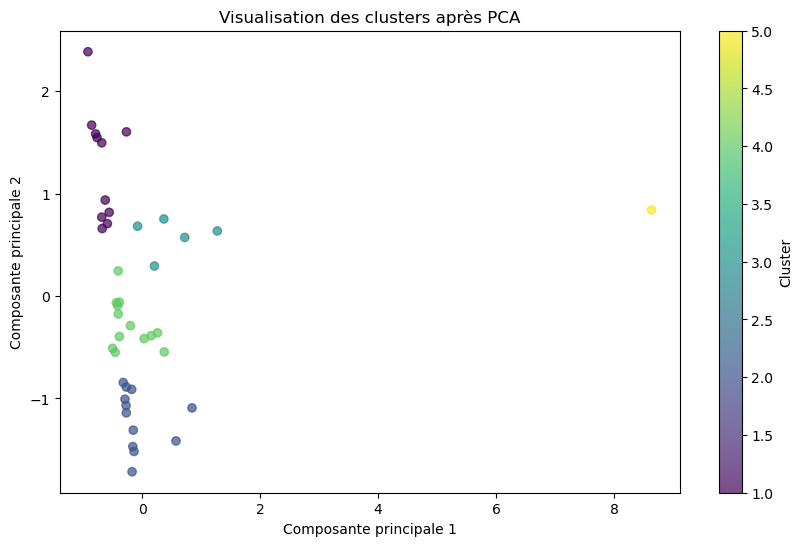

In [150]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)  # Scatter plot des clusters
plt.title("Visualisation des clusters après PCA")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.colorbar(label="Cluster")  # Légende des clusters
plt.show()

Chaque couleur représente un cluster distinct. Les pays au sein d'un même cluster partagent des similitudes significatives sur les quatre variables sélectionnées (émissions de CO2, émissions de GES, exposition au PM2.5 et taux de mortalité).

***Cluster jaune (Anomalie ou point isolé) :***
- **Composition :** Ce cluster est constitué d'un unique point isolé.
- **Interprétation :**
  - Ce point pourrait représenter un pays exceptionnel dans le dataset, par exemple les **USA**, en raison de ses valeurs extrêmes dans plusieurs indicateurs comme les émissions de CO₂, les émissions de GES, et les dépenses de santé.


***Clusters principaux :***
Les 4 autres clusters (violet, bleu, vert clair, et turquoise) montrent des regroupements clairs et naturels. Cela pourrait indiquer des sous-groupes significatifs dans les données.


***Conclusion :***
1. Le clustering a permis de dégager des groupes significatifs :
   - *Cluster jaune* : Anomalie ou exception.
   - *Cluster violet* : Pays stables avec une gestion environnementale et sanitaire efficace.
   - *Cluster bleu* : Pays développés avec des efforts modérés en environnement et santé.
   - *Cluster vert clair* : Pays en transition avec des défis environnementaux majeurs.
   - *Cluster turquoise* : Pays émergents avec des émissions élevées et une gestion sanitaire limitée.

## DBSCAN clustering :

### Problématique 
Comment regrouper automatiquement des pays en fonction de leurs niveaux d'émissions de CO₂ et de GES à l'aide de l'algorithme DBSCAN, afin de :

- Identifier des groupes homogènes partageant des caractéristiques similaires en termes d'émissions et d'exposition environnementale.
- Détecter des anomalies ou des pays au comportement atypique en matière d'émissions, pouvant nécessiter une attention particulière.
- Fournir une base d’analyse pour proposer des recommandations politiques et stratégiques adaptées aux profils d'émissions des différents groupes.

In [178]:

# Suppression de la dernière ligne de data_finale_v2
data_final_v3 = data_final_v2.drop(data_final_v2.index[-1])


***Etap1:*** *Importation des bibliothèques nécessaires et Chargement des données dans un DataFrame*

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler


df = pd.DataFrame(data_final_v3)


***Etap2:*** *Sélection de variables pertinentes pour le clustering et Standardisation des données*

In [183]:
X = df[['Emissions de CO2', 'Emissions de GES', 'Taux de mortalite']].values


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

- Ces trois variables sont utilisées pour regrouper les points de données en fonction de leur proximité dans l'espace de ces caractéristiques.

***Etap3:*** *Visualisation des données*

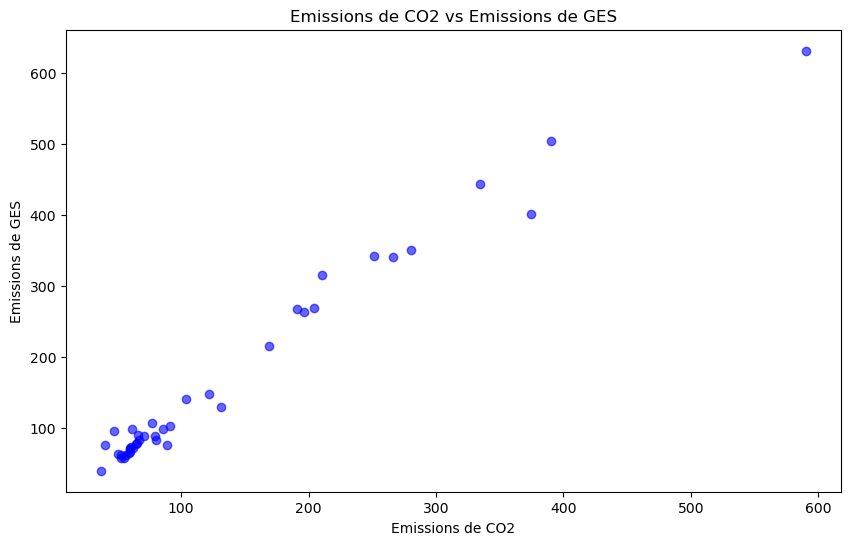

In [187]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Emissions de CO2'], df['Emissions de GES'], c='blue', alpha=0.6)
plt.xlabel('Emissions de CO2')
plt.ylabel('Emissions de GES')
plt.title('Emissions de CO2 vs Emissions de GES')
plt.show()


***Etap4:*** *Fonction pour générer le graphique des k-distances*

In [194]:
def plot_k_distance_graph(X, k):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X)
    distances, _ = neigh.kneighbors(X)
    distances = np.sort(distances[:, k-1])
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.xlabel('Points')
    plt.ylabel(f'{k}-distance')
    plt.title('Graphique des k-distances')
    plt.show()


***Etap5:*** *Tracer le graphique des k-distances*

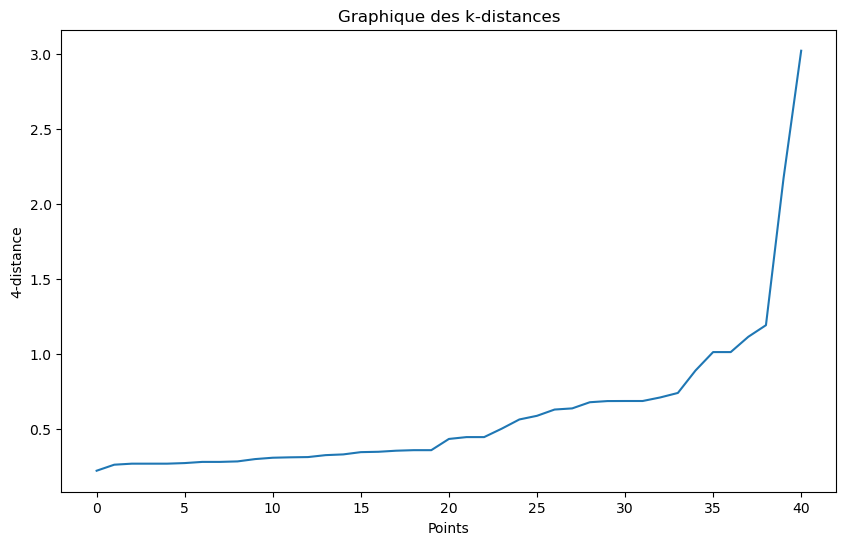

In [196]:
plot_k_distance_graph(X_scaled, 4)

En examinant ce graphique, pour identifier la coudée, qui correspond généralement au meilleur choix pour ***eps*** (distance maximale pour définir un cluster).

***Etap6:*** *Application de l'algorithme DBSCAN*

In [204]:
db = DBSCAN(eps=0.5, min_samples=4)
df['Cluster'] = db.fit_predict(X_scaled)

- Le paramètre ***eps=0.5*** définit la distance maximale pour que deux points soient considérés comme voisins.

- Le paramètre ***min_samples=4*** définit le nombre minimal de voisins pour qu'un point soit considéré comme central pour un cluster.


***Etap7:*** *Affichage des résultats de DBSCAN*

In [207]:
print("Résultats du clustering DBSCAN :")
print(df['Cluster'].value_counts())

Résultats du clustering DBSCAN :
Cluster
 0    25
-1    12
 1     4
Name: count, dtype: int64


***Etap8:*** *Visualisation des clusters*

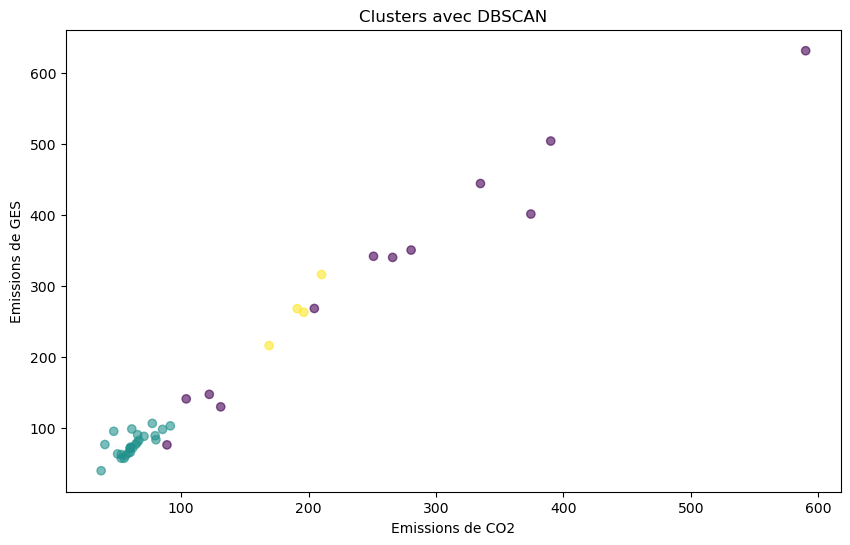

In [209]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Emissions de CO2'], df['Emissions de GES'], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Emissions de CO2')
plt.ylabel('Emissions de GES')
plt.title('Clusters avec DBSCAN')
plt.show()


Chaque groupe de points colorés dans le graphique représente un cluster détecté par DBSCAN.
Les couleurs des points (par exemple, violet, jaune, turquoise, etc.) indiquent les différents groupes formés.
Ces clusters regroupent des pays ayant des caractéristiques similaires en termes d'émissions de CO₂ et de GES.

Les clusters sont principalement formés en fonction de la proximité entre les points (selon la distance définie par les paramètres eps et min_samples).
Des groupes peuvent être observés :

- Un cluster dense en bas à gauche (points avec faibles émissions).
- Plusieurs clusters plus dispersés dans les zones centrales (entités ayant des émissions moyennes).
- Un ou plusieurs points isolés dans la zone supérieure droite (entités avec très fortes émissions).

***Interprétation des résultats :***
- ***Cluster dense en bas à gauche :*** Ces entités peuvent représenter des pays  à faibles émissions de CO₂ et de GES, comme des pays en développement ou ayant des économies moins industrialisées.
- ***Clusters intermédiaires :*** Ces groupes incluent des entités avec des émissions modérées, qui peuvent correspondre à des pays en transition économique ou des industries moyennes.
- ***Outliers (bruit) :*** Les entités avec des émissions extrêmement élevées (par exemple, de grandes puissances industrielles).

# Conclusion Générale  



Les analyses des relations entre les facteurs environnementaux (PM2.5, émissions de CO₂, GES) et leurs impacts sanitaires (mortalité, dépenses de santé) ont révélé des résultats significatifs, mettant en lumière des interactions complexes grâce à des approches statistiques variées et complémentaires.  

- **Impact des PM2.5 sur la mortalité** : Une corrélation positive et significative a été mise en évidence. Les modèles linéaires et non linéaires montrent que l'exposition aux PM2.5 contribue à expliquer une part notable, mais non exclusive, de la variabilité dans les taux de mortalité.  

- **Effet des émissions de CO₂ et GES sur les dépenses de santé** : Les résultats confirment une influence directe et significative des émissions sur les coûts de santé, avec un modèle de régression multiple qui explique une large part de cette variabilité.  

- **Relations complexes entre variables** : L'Analyse en Composantes Principales (ACP) a permis de réduire la dimensionnalité des données tout en identifiant des relations clés entre la pollution, la mortalité, et les dépenses de santé, variant selon le niveau de développement des pays.  

- **Clustering des pays** : Les méthodes de classification (CAH et DBSCAN) ont révélé des regroupements significatifs, différenciant les pays selon leurs défis environnementaux et sanitaires, offrant ainsi des bases solides pour des stratégies adaptées et ciblées.